In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,emp_provided,salary,min_salary,max_salary,avg,job_state,HQ_job,age,python,spark,excel,aws,r_studio
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53 - 91,53,91,72.0,NM,0,49,1,0,1,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63 - 112,63,112,87.5,MD,0,38,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80 - 90,80,90,85.0,FL,1,12,1,1,1,0,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56 - 97,56,97,76.5,WA,1,57,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86 - 143,86,143,114.5,NY,1,24,1,0,1,0,0
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",0,0,71 - 119,71,119,95.0,TX,1,22,1,0,1,1,0
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1,0,0,54 - 93,54,93,73.5,MD,1,14,0,0,1,0,0
7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1,0,0,86 - 142,86,142,114.0,CA,0,17,1,1,1,1,0
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,0,0,38 - 84,38,84,61.0,NY,1,8,0,0,0,0,0
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel",0,0,120 - 160,120,160,140.0,NY,1,13,1,1,0,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'emp_provided', 'salary', 'min_salary', 'max_salary', 'avg',
       'job_state', 'HQ_job', 'age', 'python', 'spark', 'excel', 'aws',
       'r_studio'],
      dtype='object')

In [5]:
def title_simplify(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning engineer' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'Research Scientist' in title.lower():
        return 'Scientist'
    elif 'R&D' in title.lower():
        return 'Scientist'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else: return 'na'

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplify)
df['job_simp'].value_counts()

data scientist    279
na                194
data engineer     119
analyst           102
manager            22
director           14
mle                12
Name: job_simp, dtype: int64

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        519
senior    220
junior      3
Name: seniority, dtype: int64

In [8]:
df['job_state']=df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [9]:
df['desc_len'] = df['Job Description'].apply(lambda x:len(x))
df['desc_len']

0       2536
1       4783
2       3461
3       3883
4       2728
5       3747
6       1786
7       3804
8       1538
9       4574
10      2757
11      3490
12      3934
13      4897
14      3731
15      1889
16      3639
17      4163
18      3512
19      4397
20      2918
21      6909
22      6408
23      2907
24      3760
25      3698
26      4420
27      4900
28      5015
29      3461
30      3883
31      3342
32      5045
33      2327
34      2161
35      1739
36      5000
37      3703
38      3555
39      1739
40      3053
41      1996
42      3833
43      3550
44      9120
45      3213
46      7286
47      3412
48      2682
49      2739
50      2915
51      4244
52      1629
53      4734
54      4448
55      3543
56      4203
57      5020
58      1786
59      3747
60      4804
61      1382
62      2933
63      4945
64      2493
65      1939
66      3081
67      8397
68      2306
69      2291
70      1886
71      2903
72      2653
73      4427
74      2609
75      4295
76      3405

In [10]:
def ownership(types):
    if 'private' in types.lower():
        return 'private'
    elif 'public' in types.lower():
        return 'public'
    elif 'university' in types.lower():
        return 'educational institution'
    elif 'college' in types.lower():
        return 'educational institution'
    elif 'Nonprofit Organization' in types.lower():
        return 'NGO'
    else: return 'na'

In [11]:
df['ownership_types'] = df['Type of ownership'].apply(ownership)

In [12]:
df['ownership_types'].value_counts()

private                    410
public                     193
na                         126
educational institution     13
Name: ownership_types, dtype: int64

In [13]:
df['num_comp']=df['Competitors'].apply(lambda x: len(x.split(',')) if x!=-1 else 0)
df['num_comp']

0      1
1      1
2      1
3      3
4      3
5      3
6      1
7      1
8      1
9      2
10     1
11     1
12     3
13     1
14     3
15     1
16     3
17     1
18     1
19     1
20     3
21     1
22     1
23     1
24     3
25     1
26     1
27     1
28     1
29     1
30     3
31     1
32     1
33     1
34     3
35     1
36     1
37     1
38     1
39     1
40     3
41     1
42     1
43     3
44     3
45     1
46     3
47     1
48     3
49     3
50     1
51     3
52     1
53     3
54     1
55     1
56     3
57     2
58     1
59     3
60     1
61     1
62     1
63     3
64     3
65     1
66     1
67     4
68     1
69     1
70     1
71     1
72     1
73     3
74     3
75     1
76     1
77     1
78     1
79     3
80     1
81     1
82     3
83     3
84     1
85     1
86     3
87     1
88     1
89     1
90     1
91     3
92     1
93     1
94     1
95     3
96     3
97     3
98     3
99     1
100    1
101    3
102    3
103    3
104    3
105    1
106    3
107    1
108    3
109    3
110    2
1

In [14]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly==1 else x.max_salary, axis=1)

In [15]:
df[df['hourly']==1][['hourly','min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [16]:
df.describe()

,Rating,Founded,hourly,emp_provided,min_salary,max_salary,avg,HQ_job,age,python,spark,excel,aws,r_studio,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,48.456873,0.528302,0.225067,0.522911,0.237197,0.001348,3869.545822,1.673854
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.900445,0.499535,0.417908,0.499812,0.425651,0.036711,1521.495868,0.918451
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,1.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,1.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3731.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'emp_provided', 'salary', 'min_salary', 'max_salary', 'avg',
       'job_state', 'HQ_job', 'age', 'python', 'spark', 'excel', 'aws',
       'r_studio', 'job_simp', 'seniority', 'desc_len', 'ownership_types',
       'num_comp'],
      dtype='object')

<AxesSubplot:>

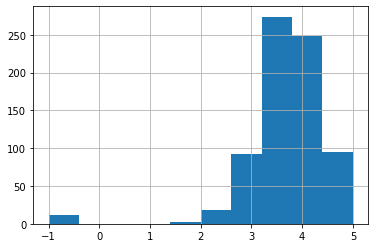

In [18]:
df.Rating.hist()

<AxesSubplot:>

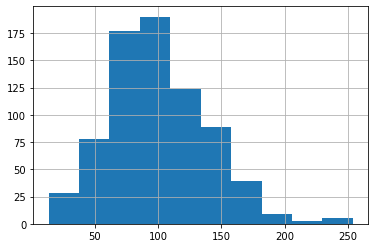

In [19]:
df.avg.hist()

<AxesSubplot:>

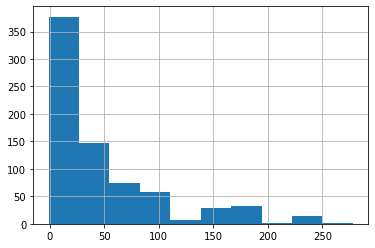

In [20]:
df.age.hist()

<AxesSubplot:>

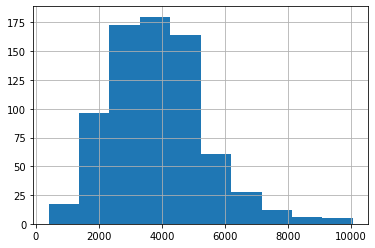

In [21]:
df.desc_len.hist()

<AxesSubplot:>

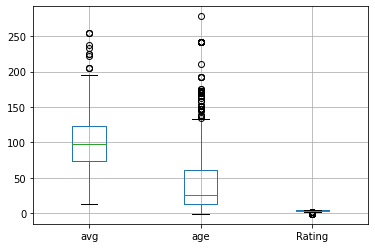

In [22]:
df.boxplot(column=['avg','age', 'Rating'])

<AxesSubplot:>

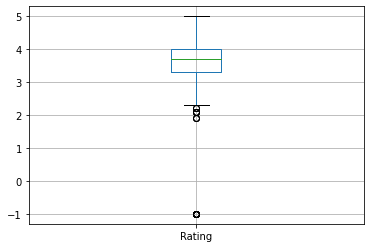

In [23]:
df.boxplot(column=['Rating'])

In [24]:
cor=df[['avg','age', 'Rating', 'desc_len', 'num_comp']].corr()

In [25]:
# cmap=sns.diverging_palette(220,10, as_cmap=True)
# sns.heatmap(data=cor, vmax=.3, center=0,cmap=cmap, square=True, linewidths=.5, cbar_kws=('shrink':.5))

<AxesSubplot:>

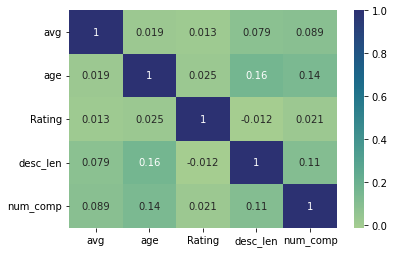

In [26]:
sns.heatmap(cor, cmap="crest", annot=True)

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'emp_provided', 'salary', 'min_salary', 'max_salary', 'avg',
       'job_state', 'HQ_job', 'age', 'python', 'spark', 'excel', 'aws',
       'r_studio', 'job_simp', 'seniority', 'desc_len', 'ownership_types',
       'num_comp'],
      dtype='object')

In [28]:
df_cat=df[[ 'Industry', 'Sector',
       'hourly', 'min_salary', 'max_salary', 'avg',
       'job_state', 'python', 'spark', 'excel', 'aws',
       'r_studio', 'job_simp', 'seniority']]

graph for Industry: total = 60


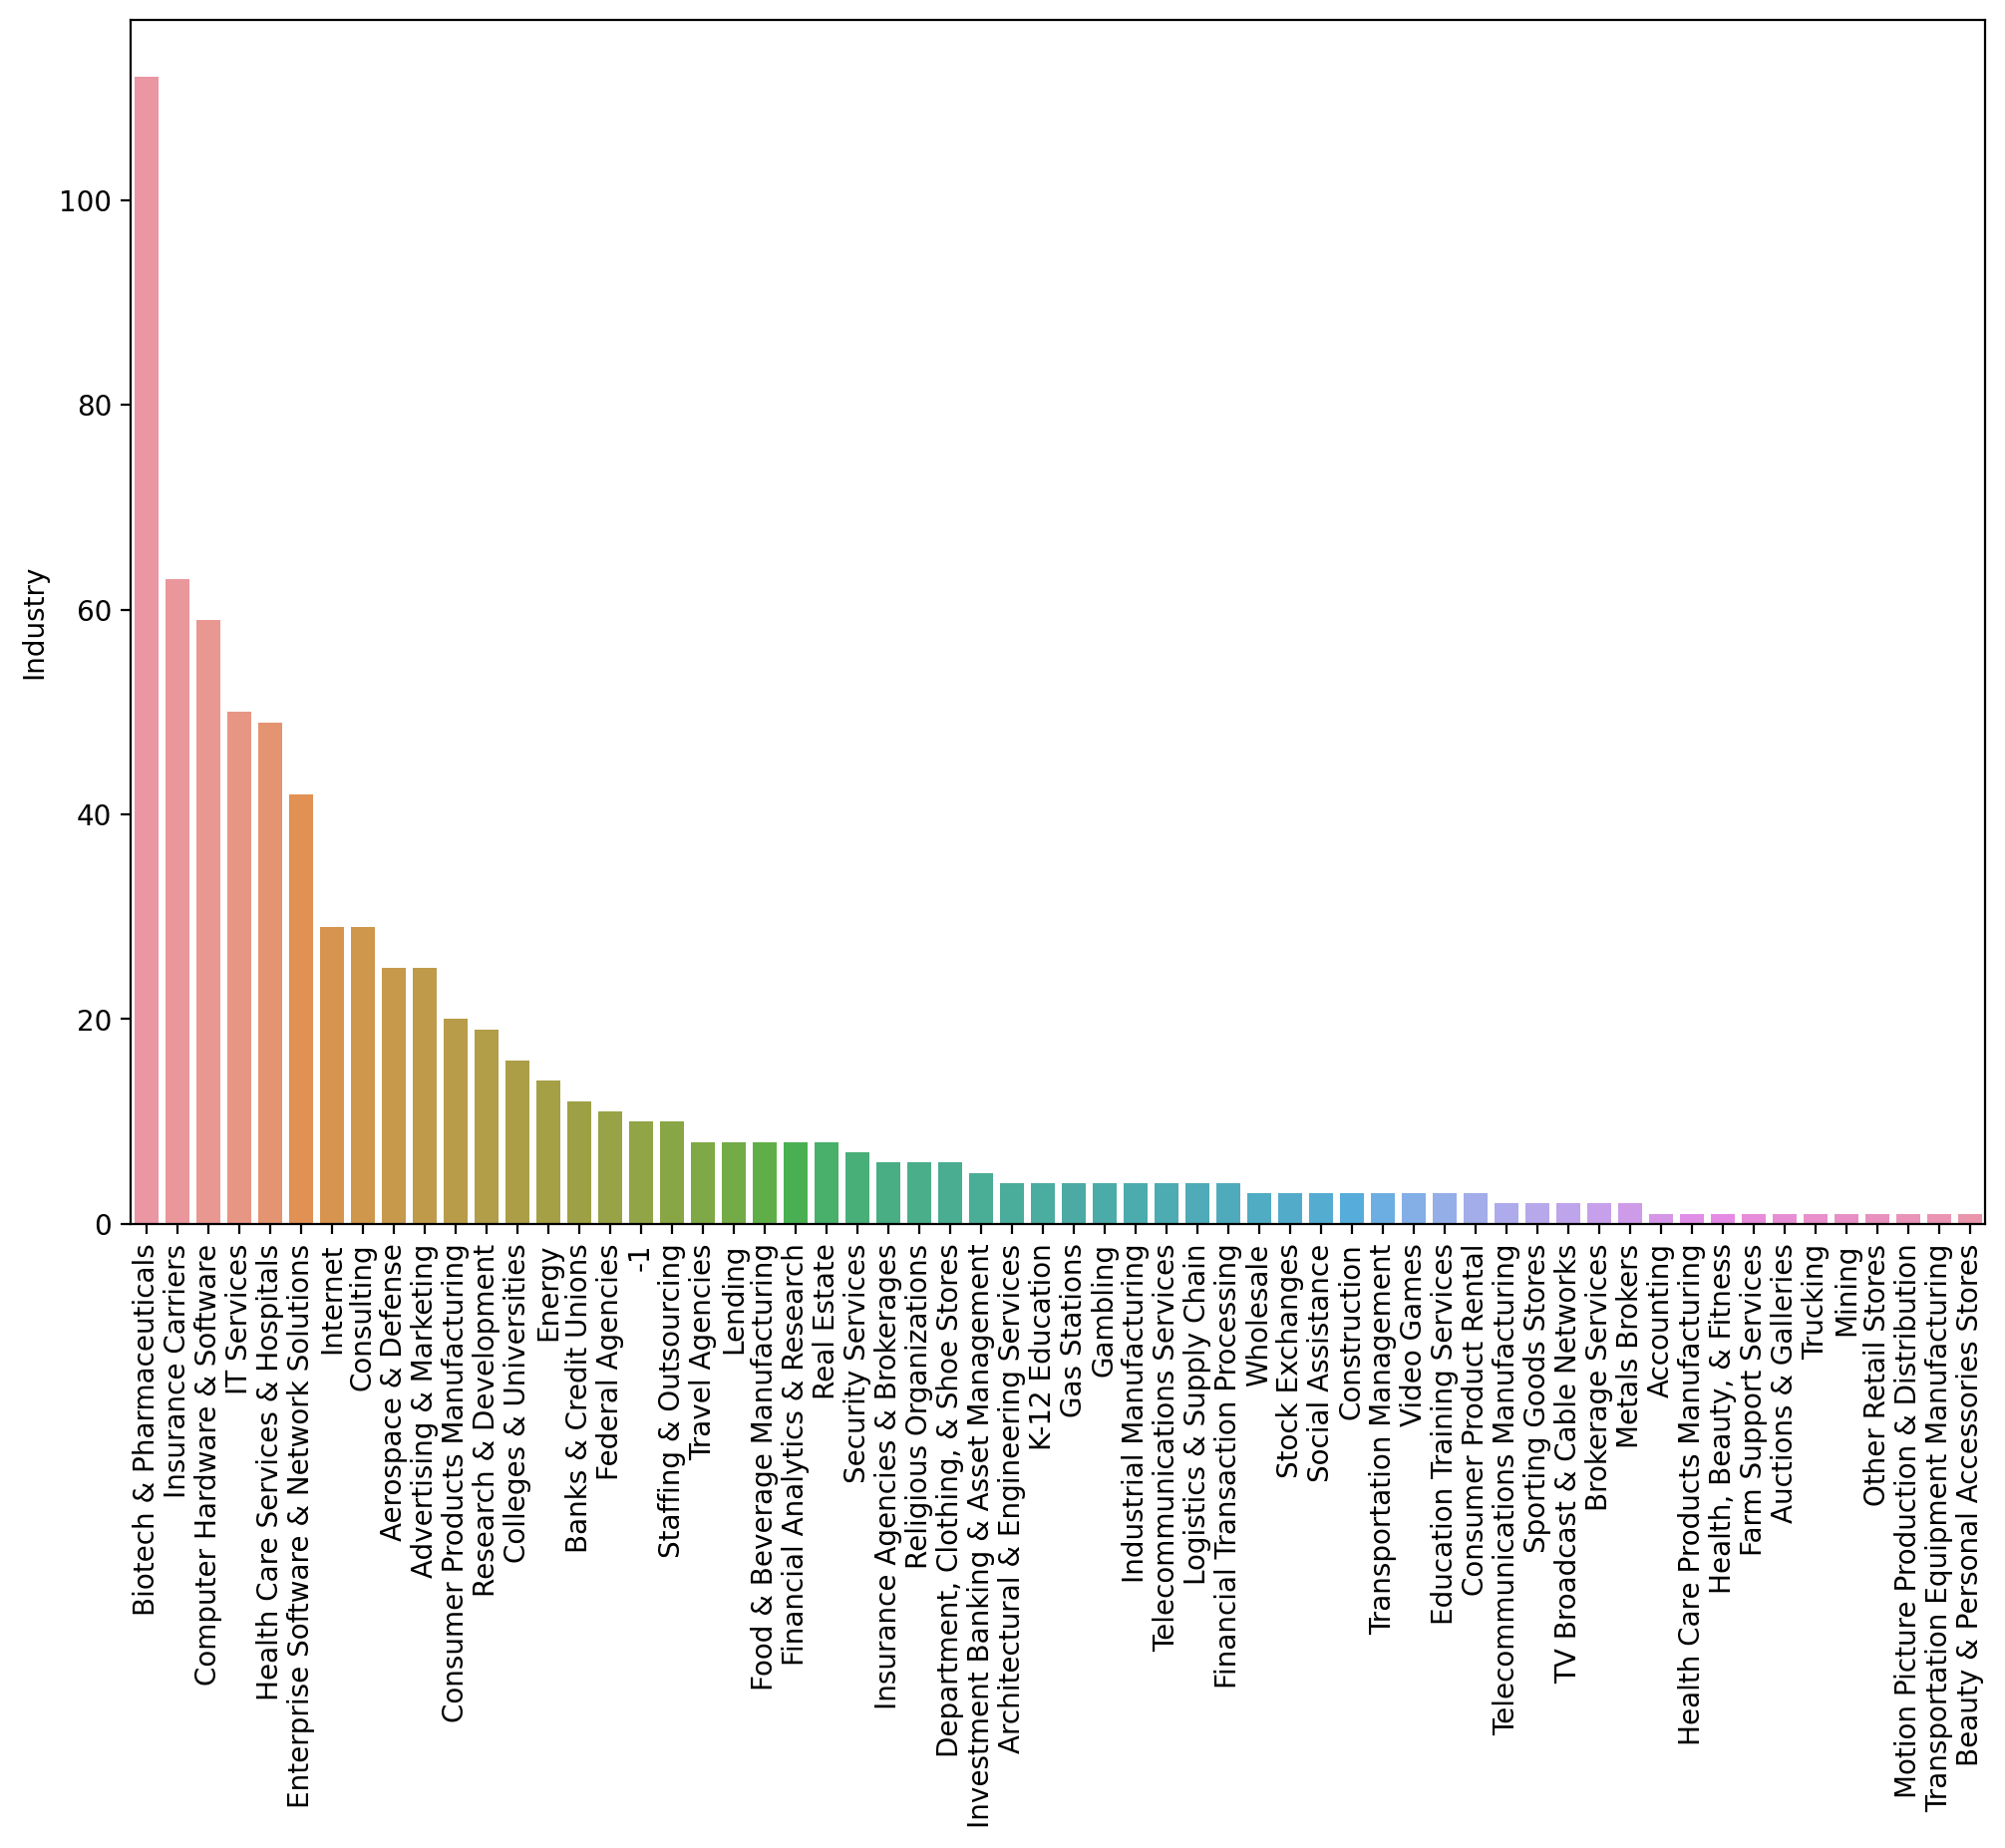

graph for Sector: total = 25


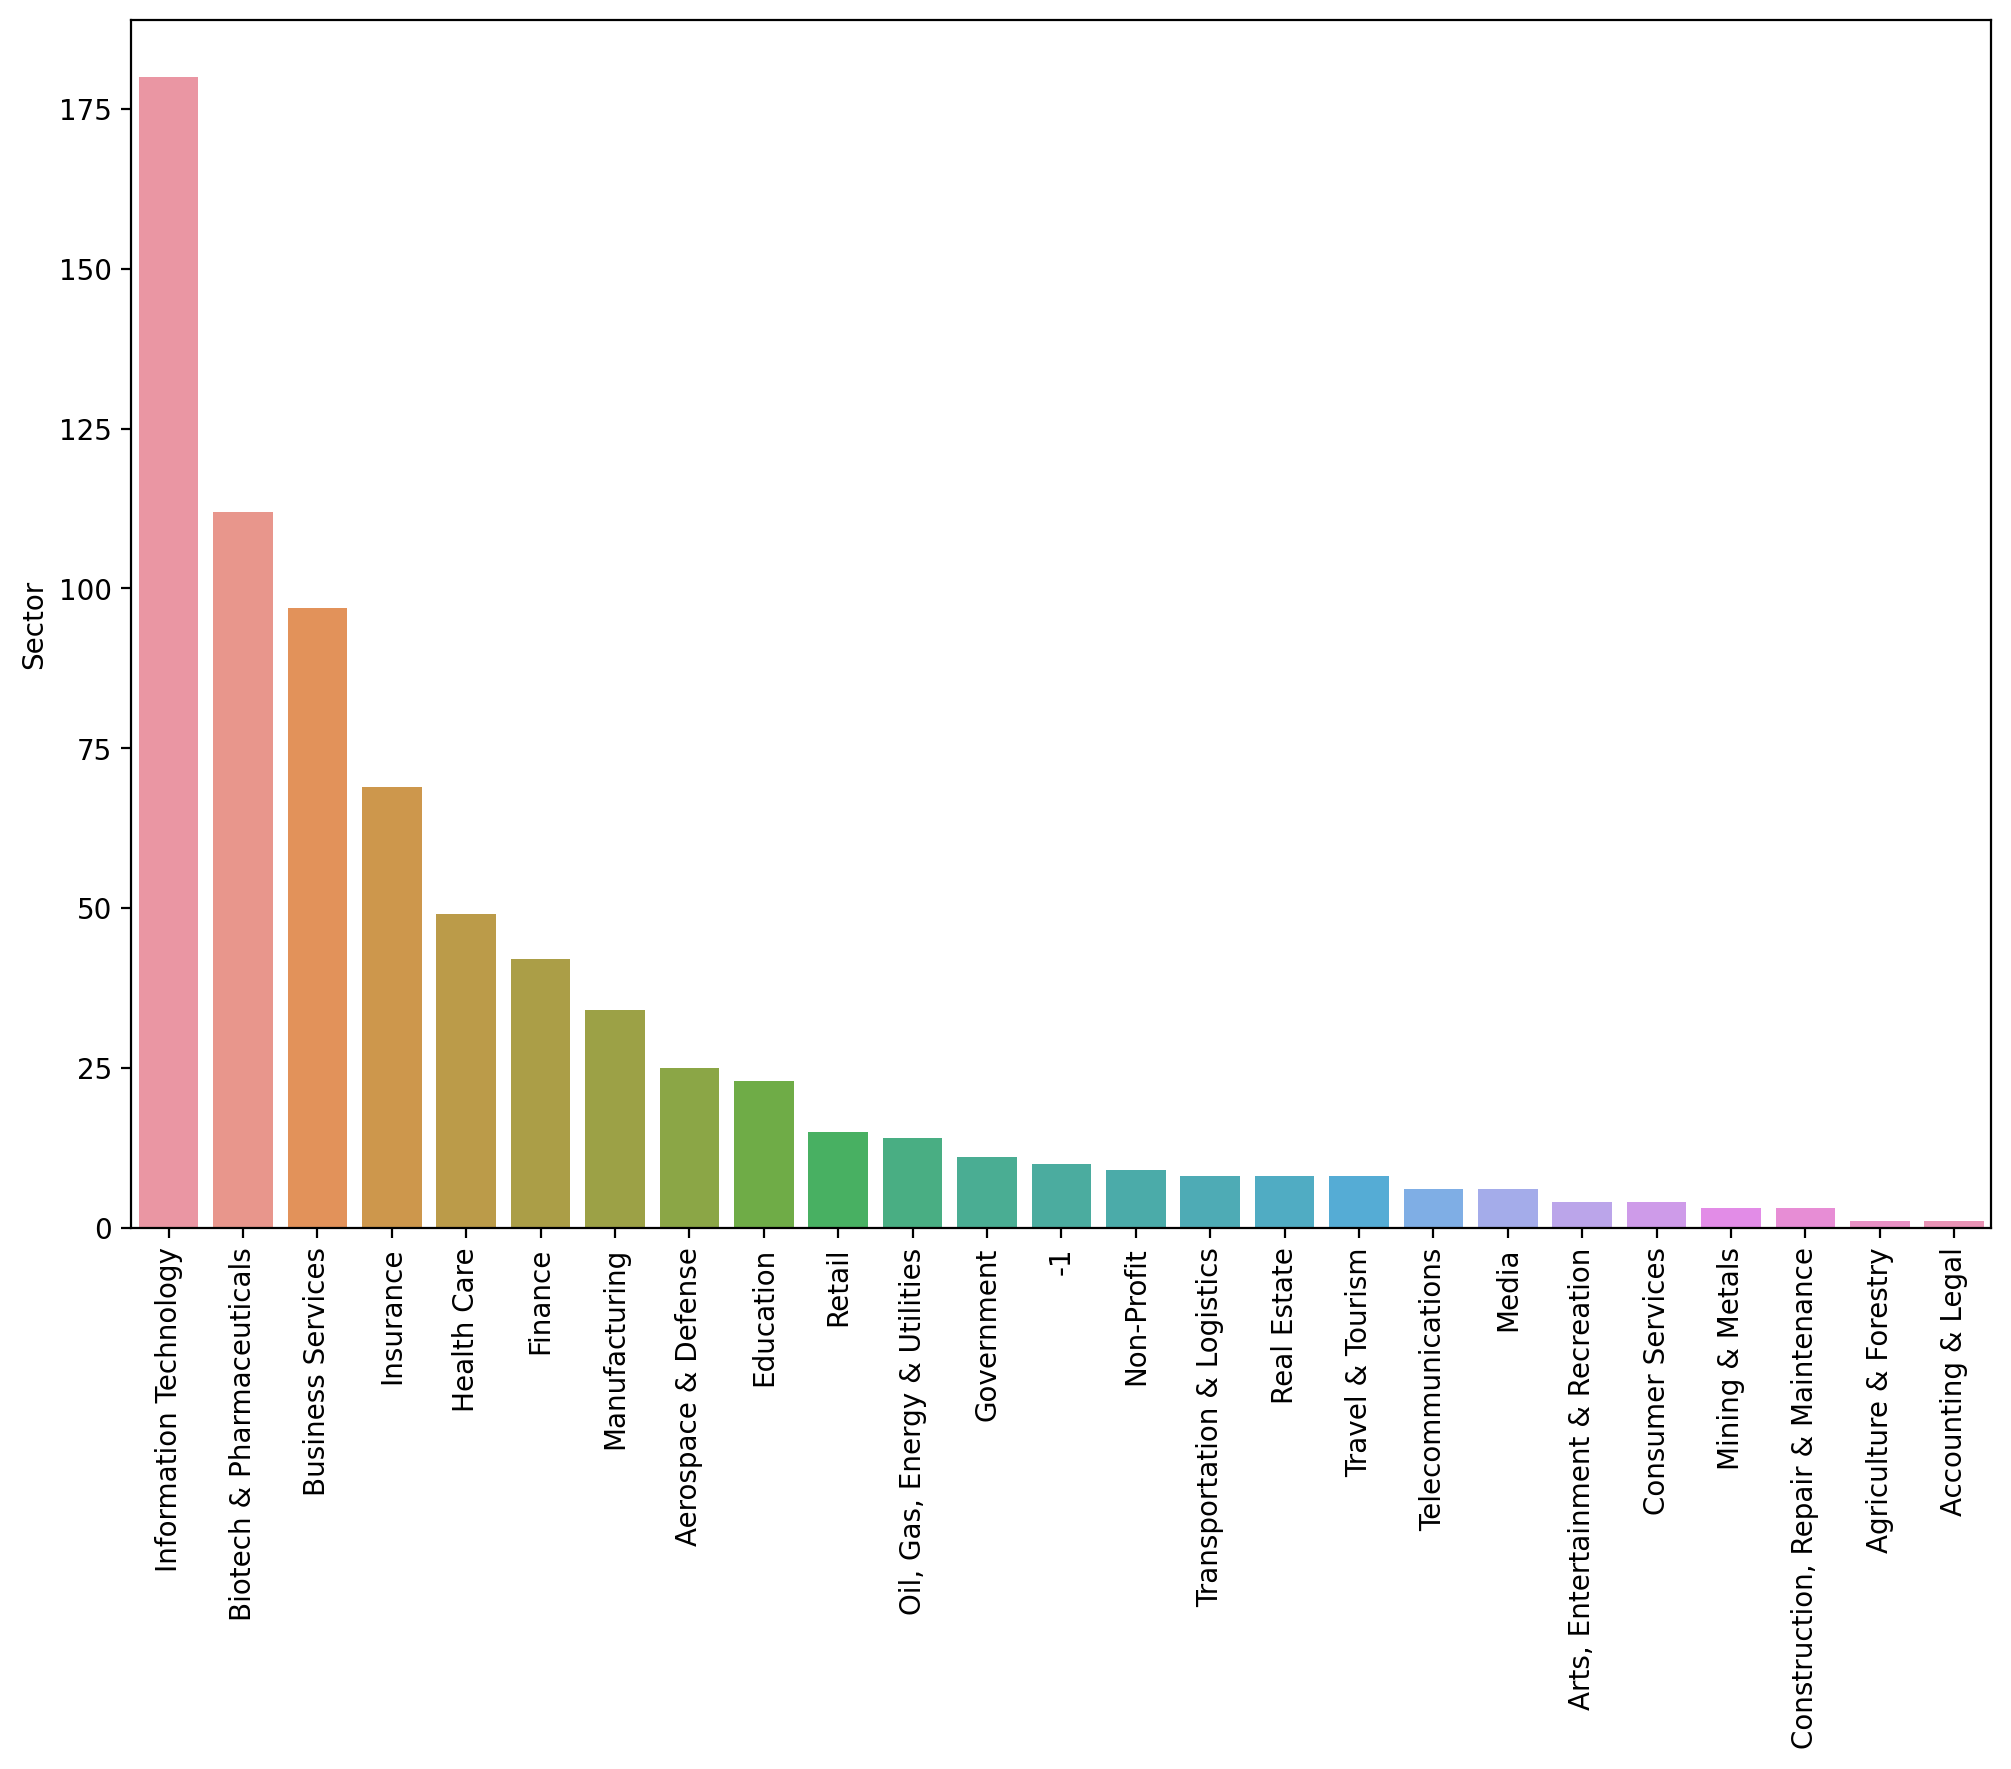

graph for hourly: total = 2


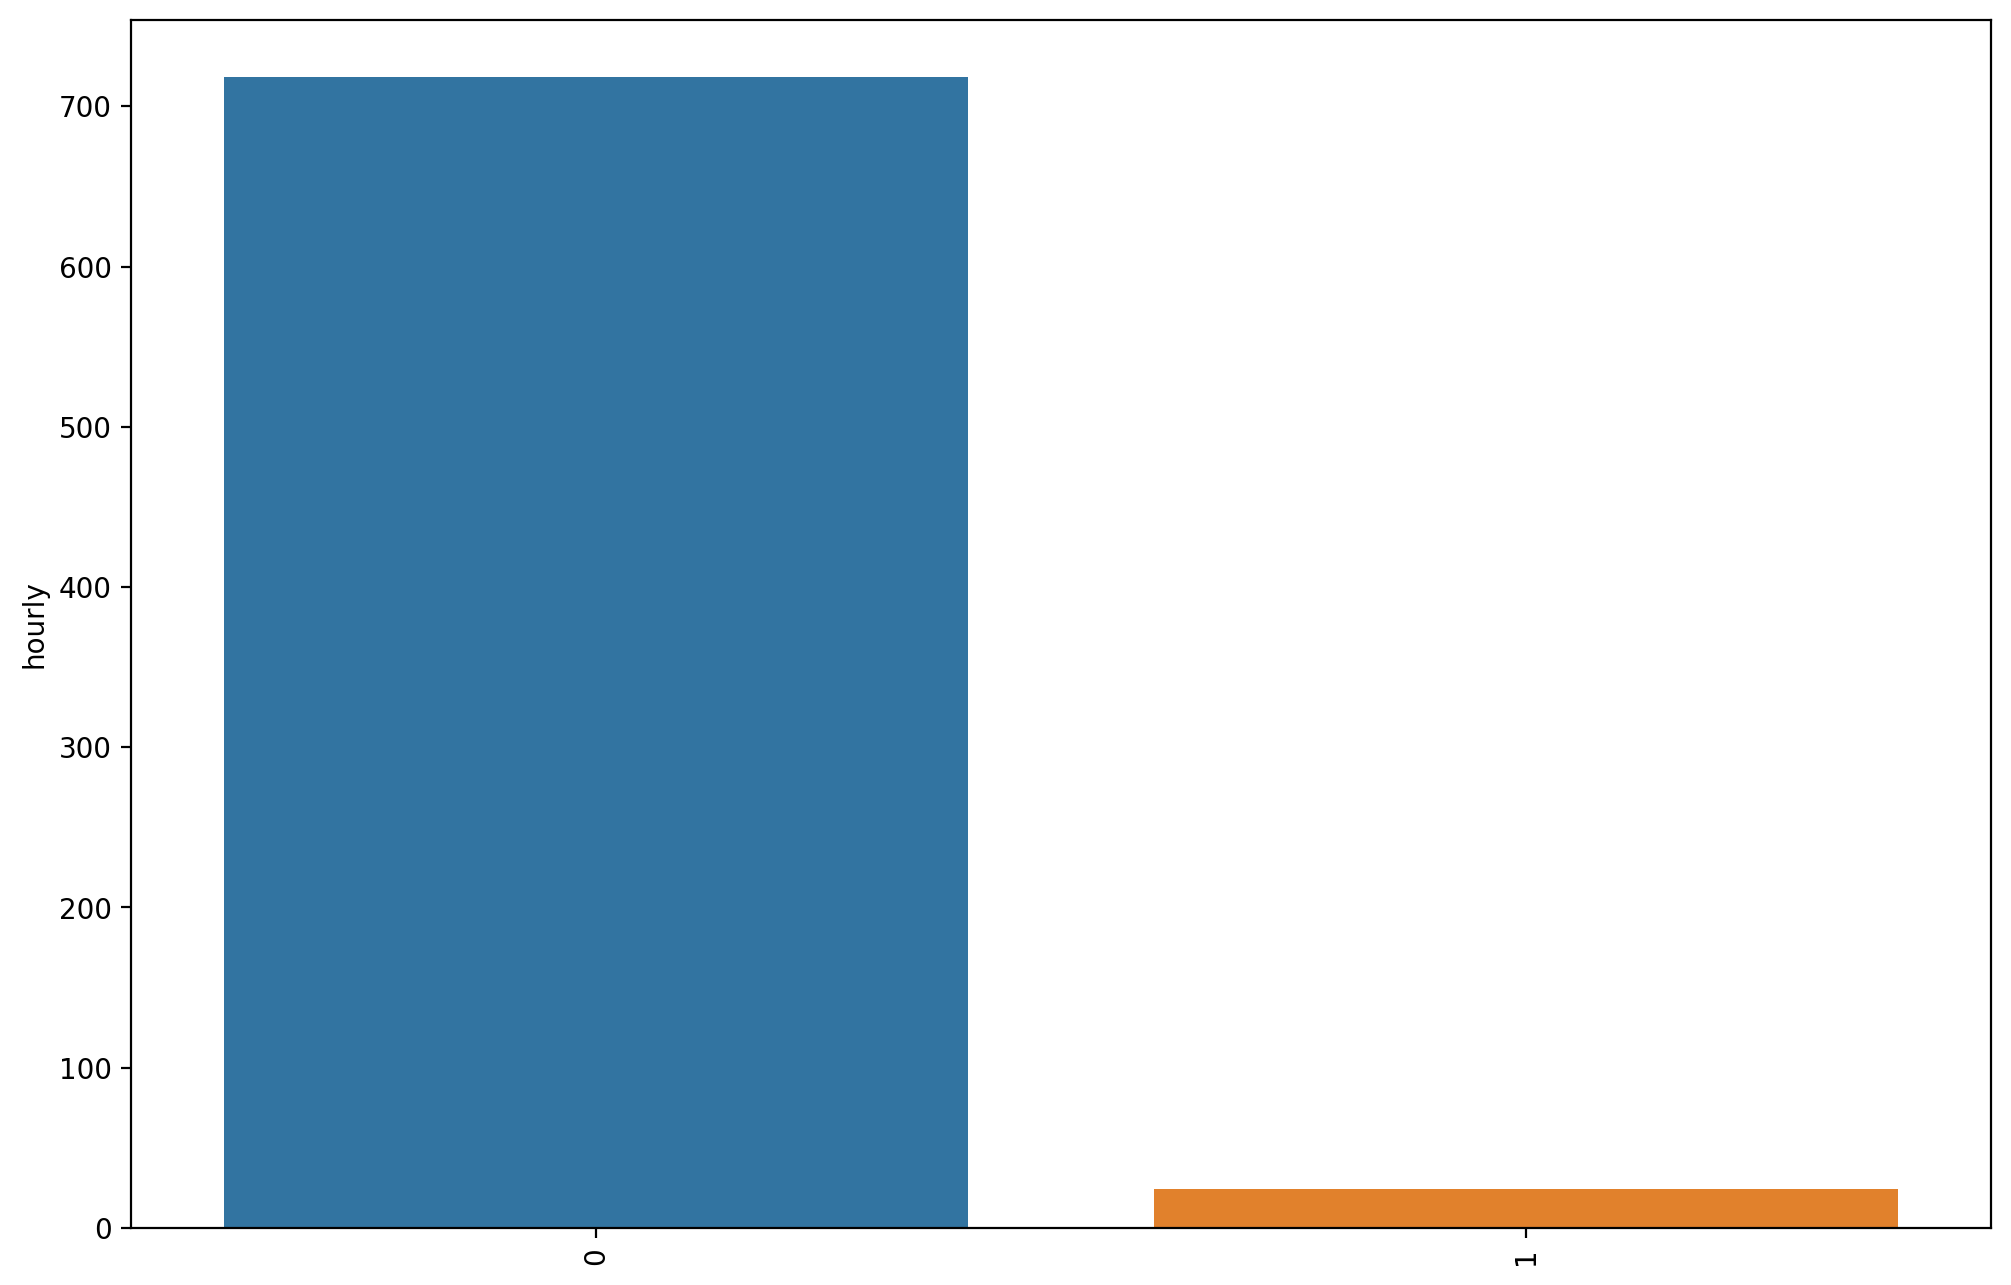

graph for min_salary: total = 114


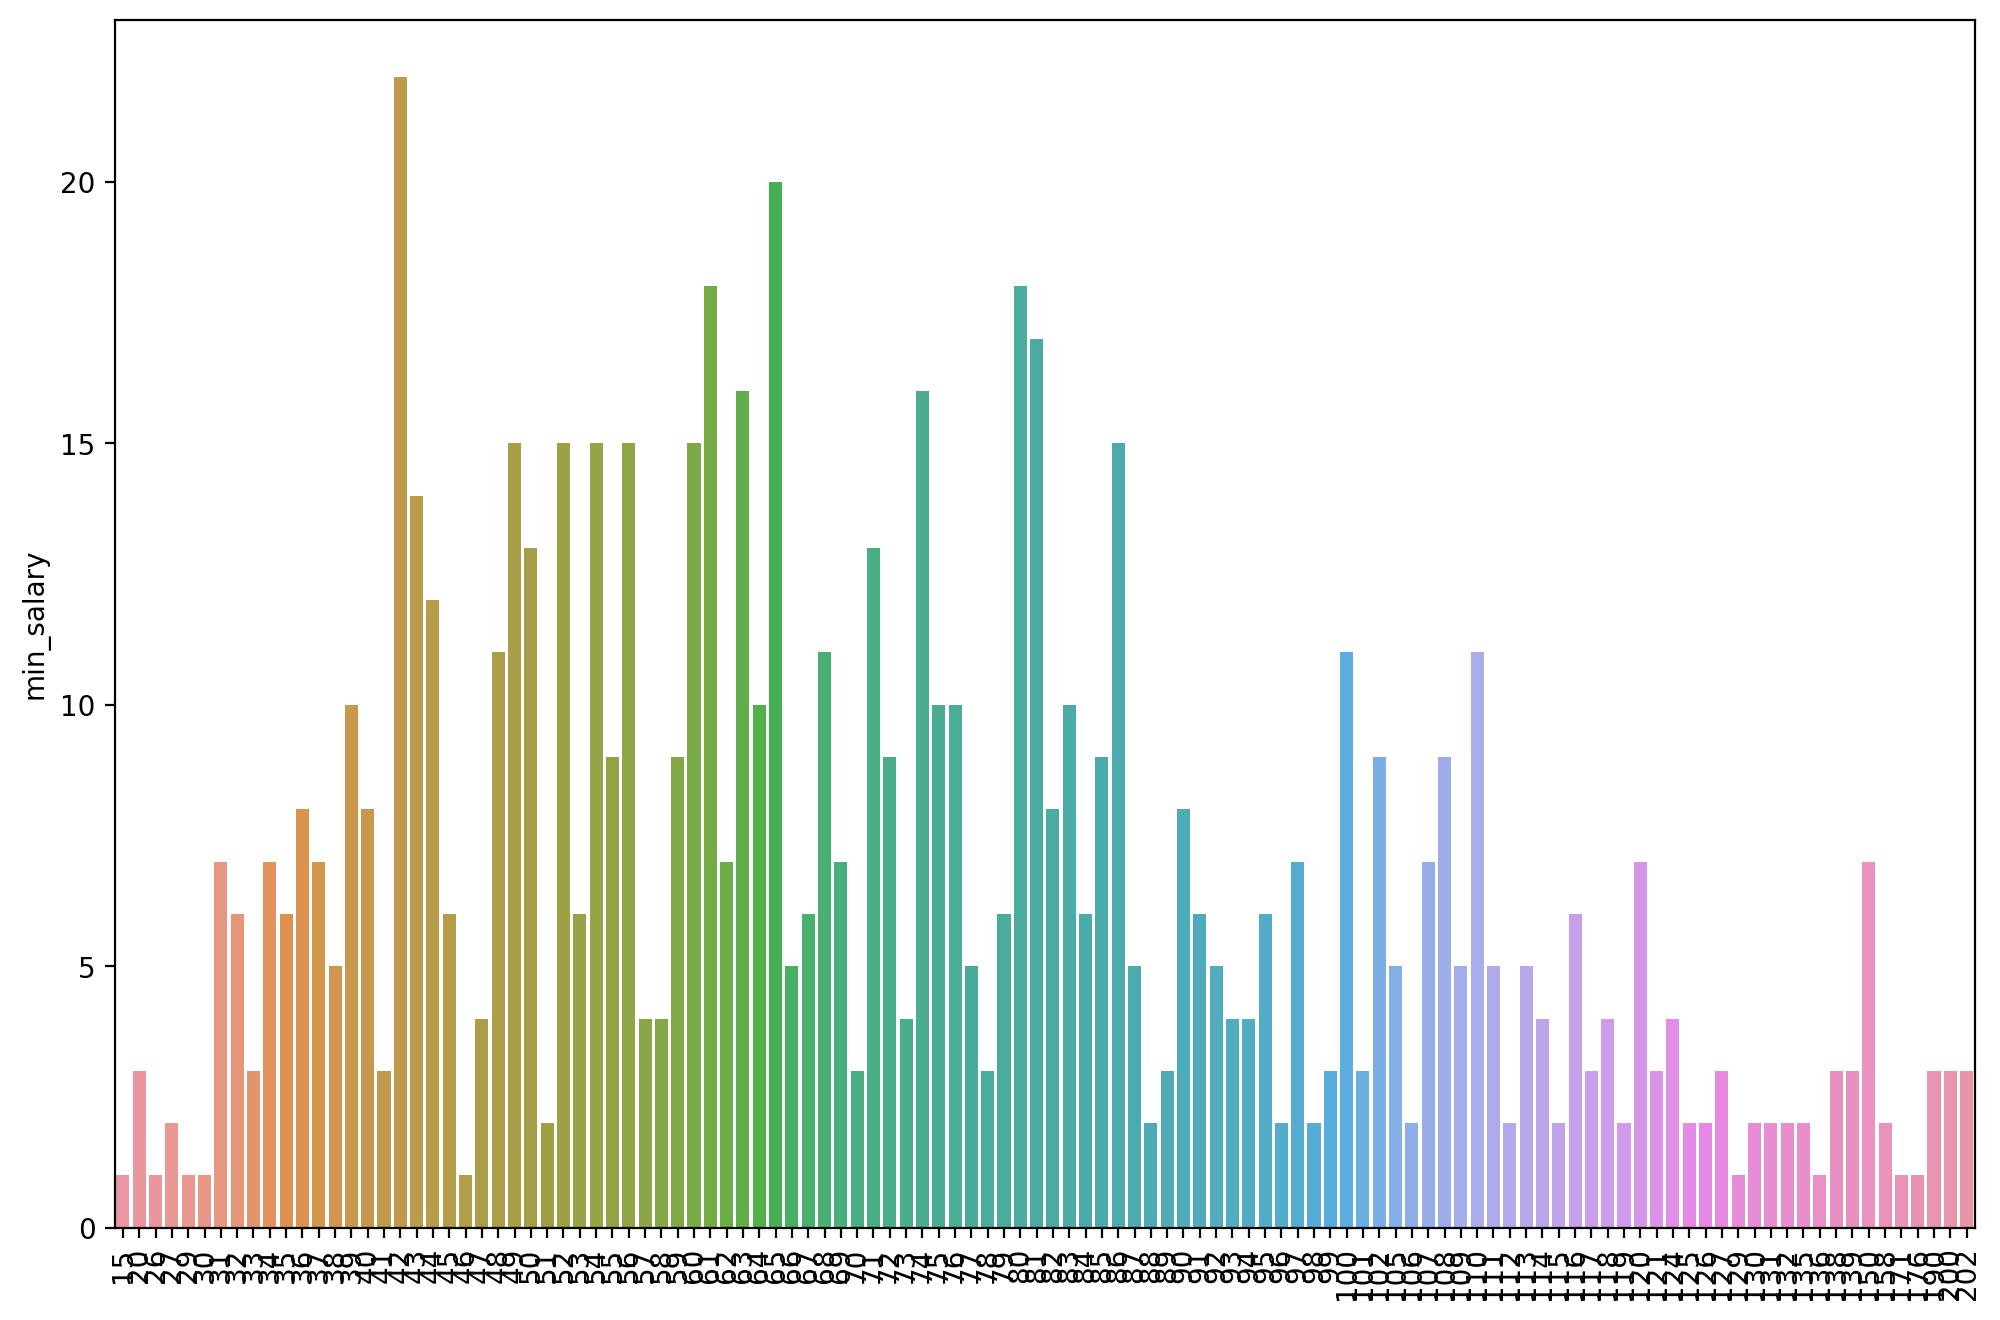

graph for max_salary: total = 160


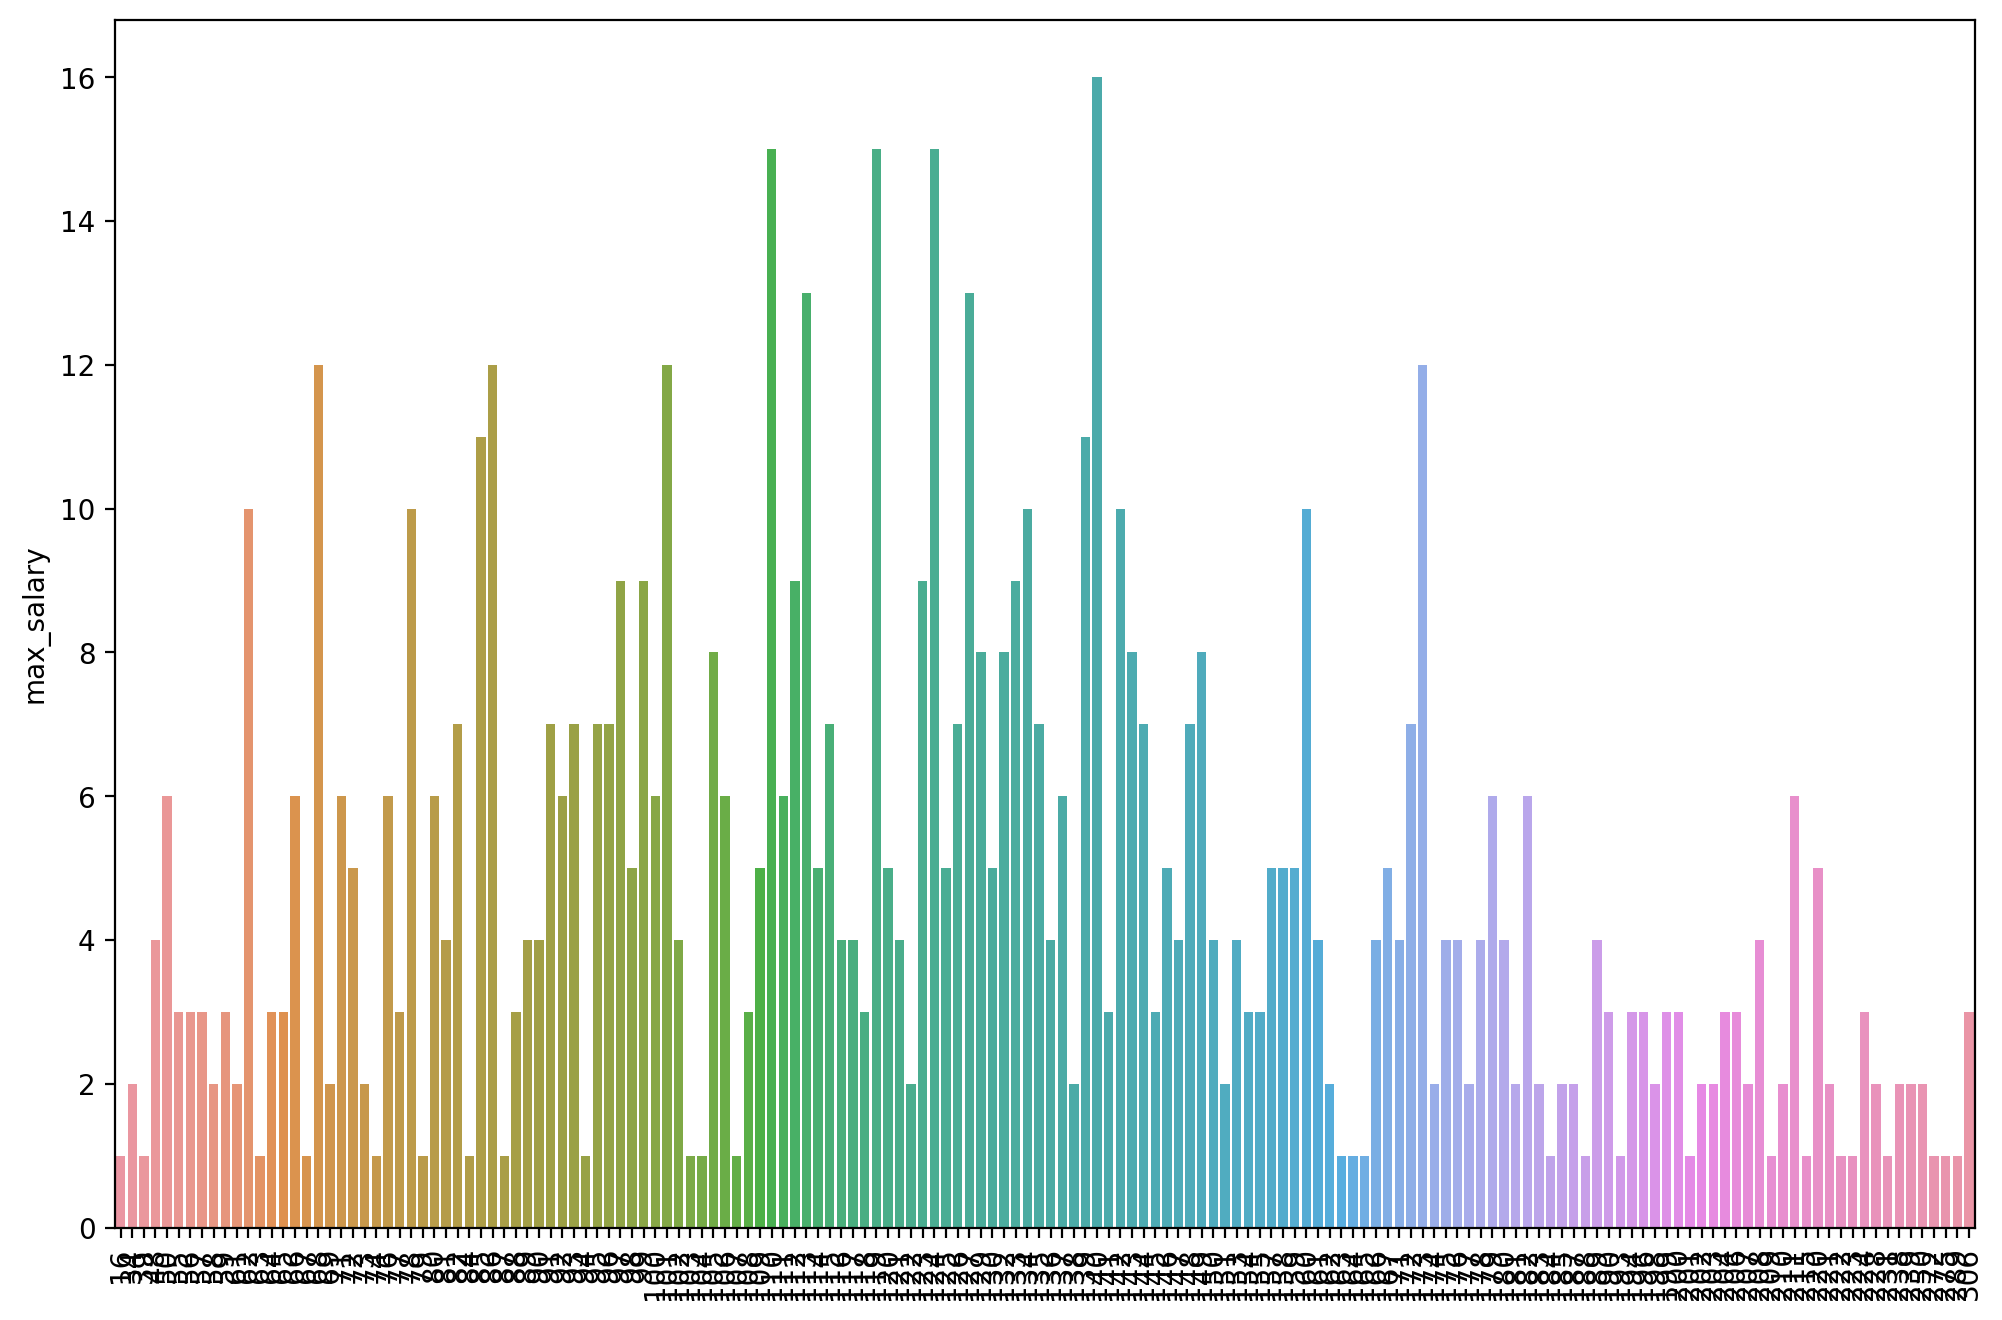

graph for avg: total = 225


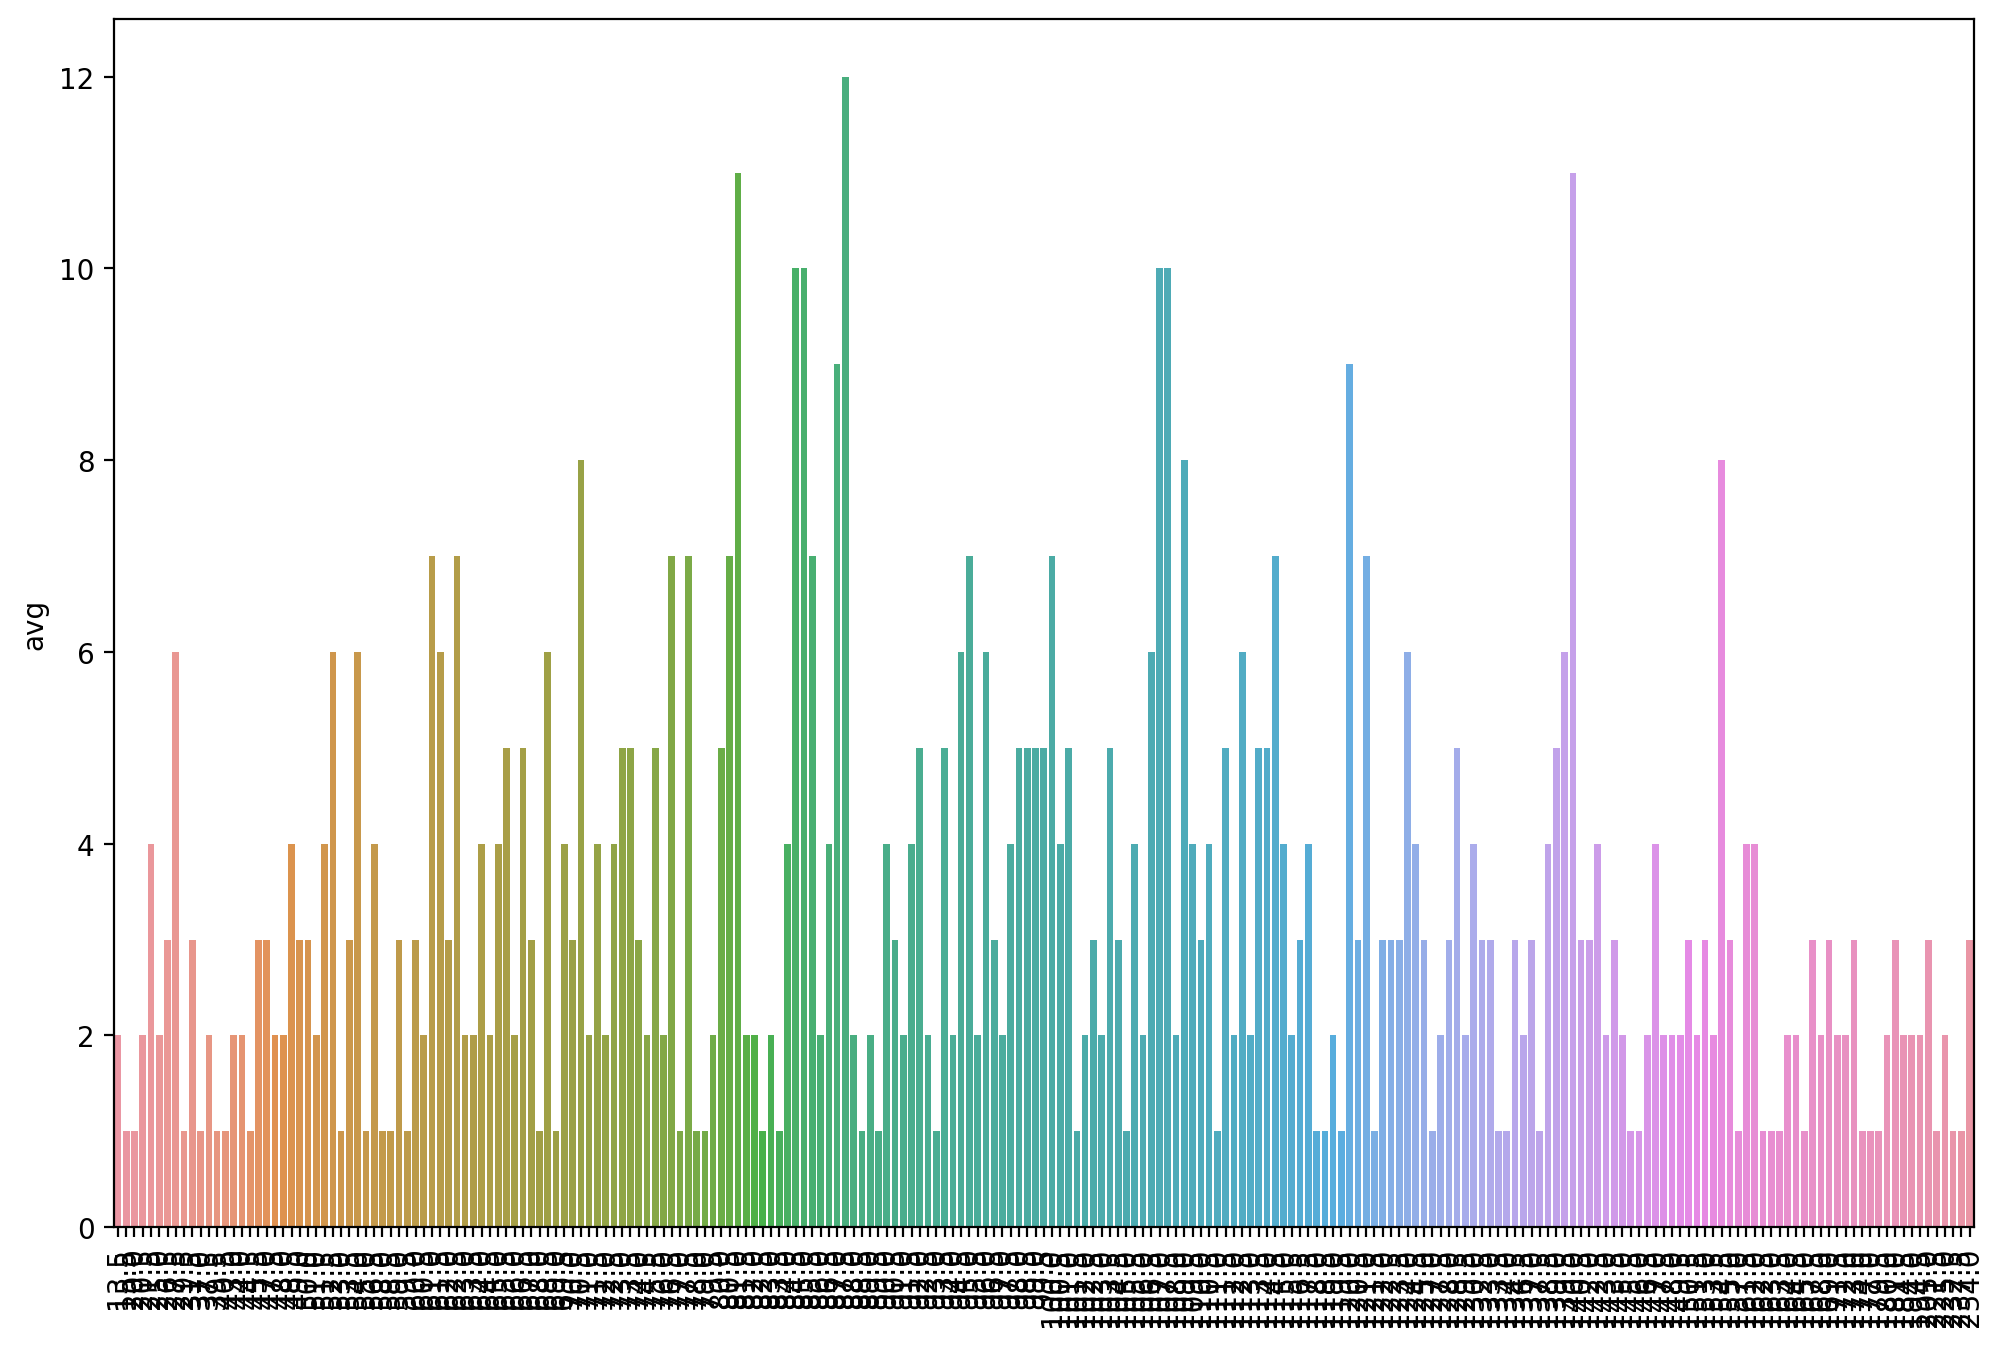

graph for job_state: total = 37


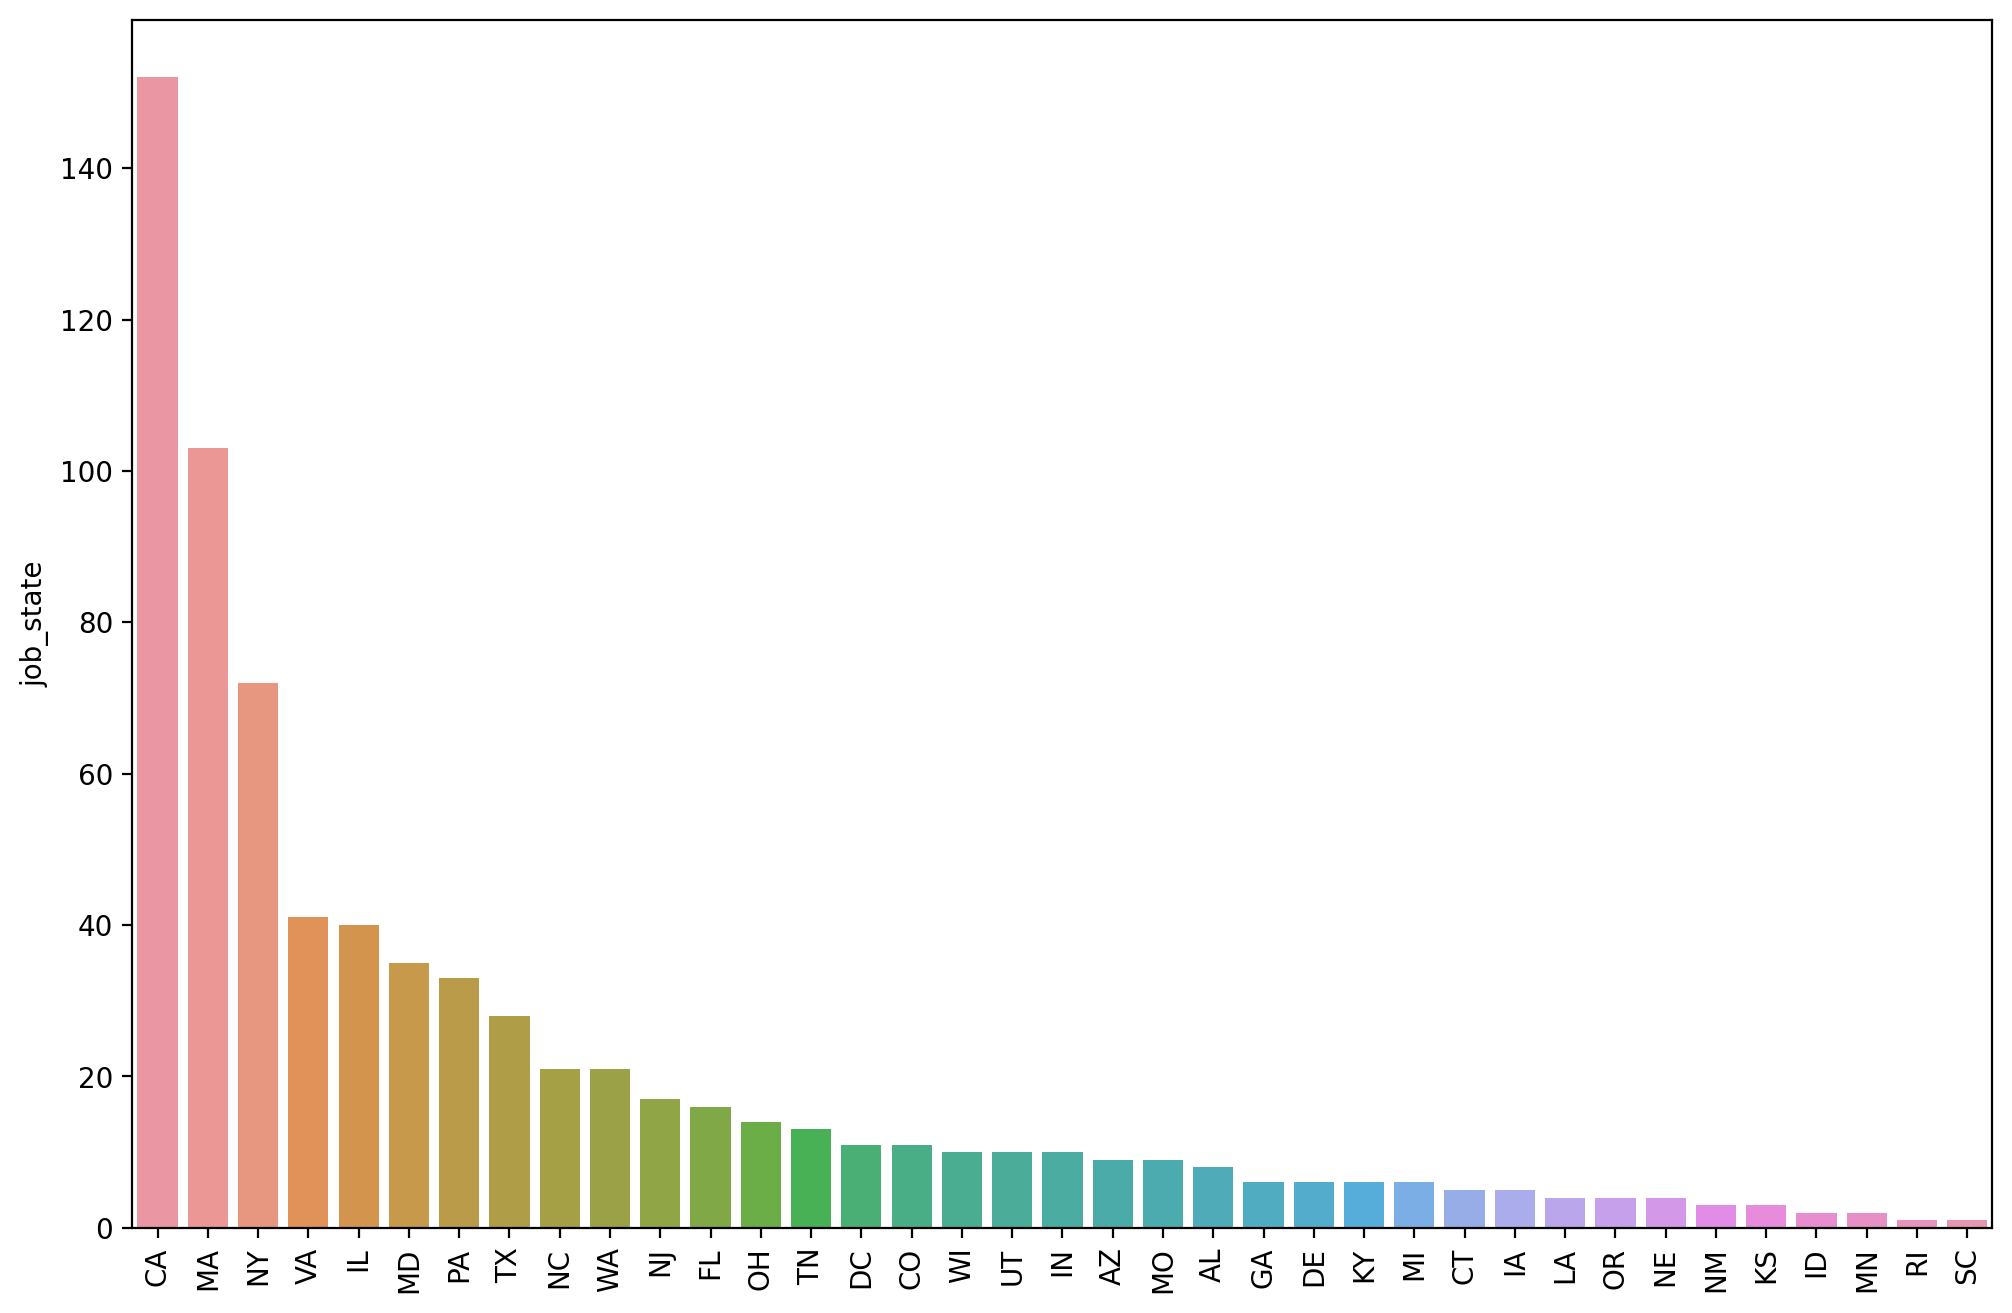

graph for python: total = 2


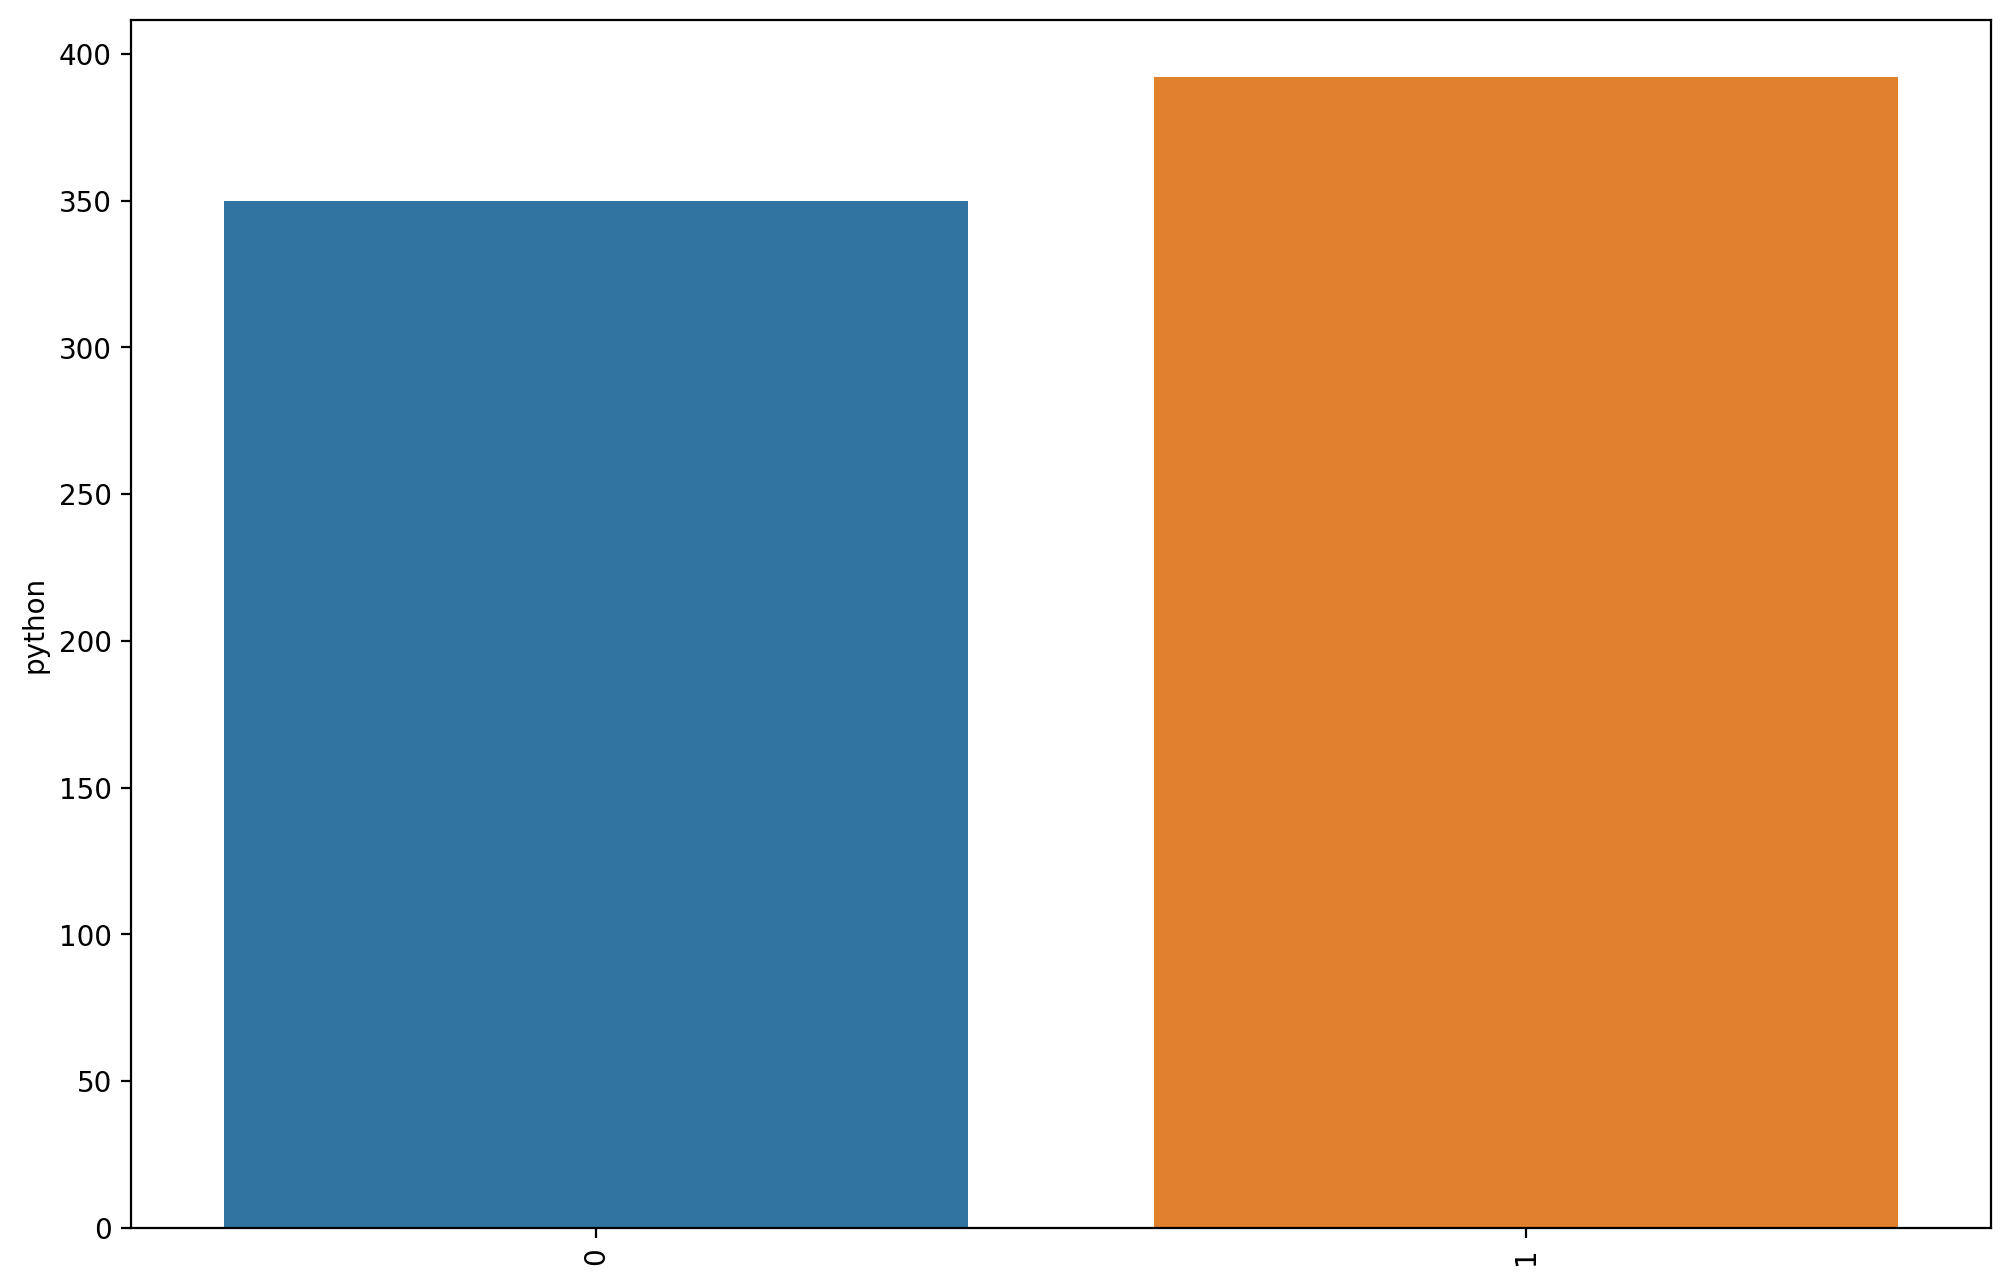

graph for spark: total = 2


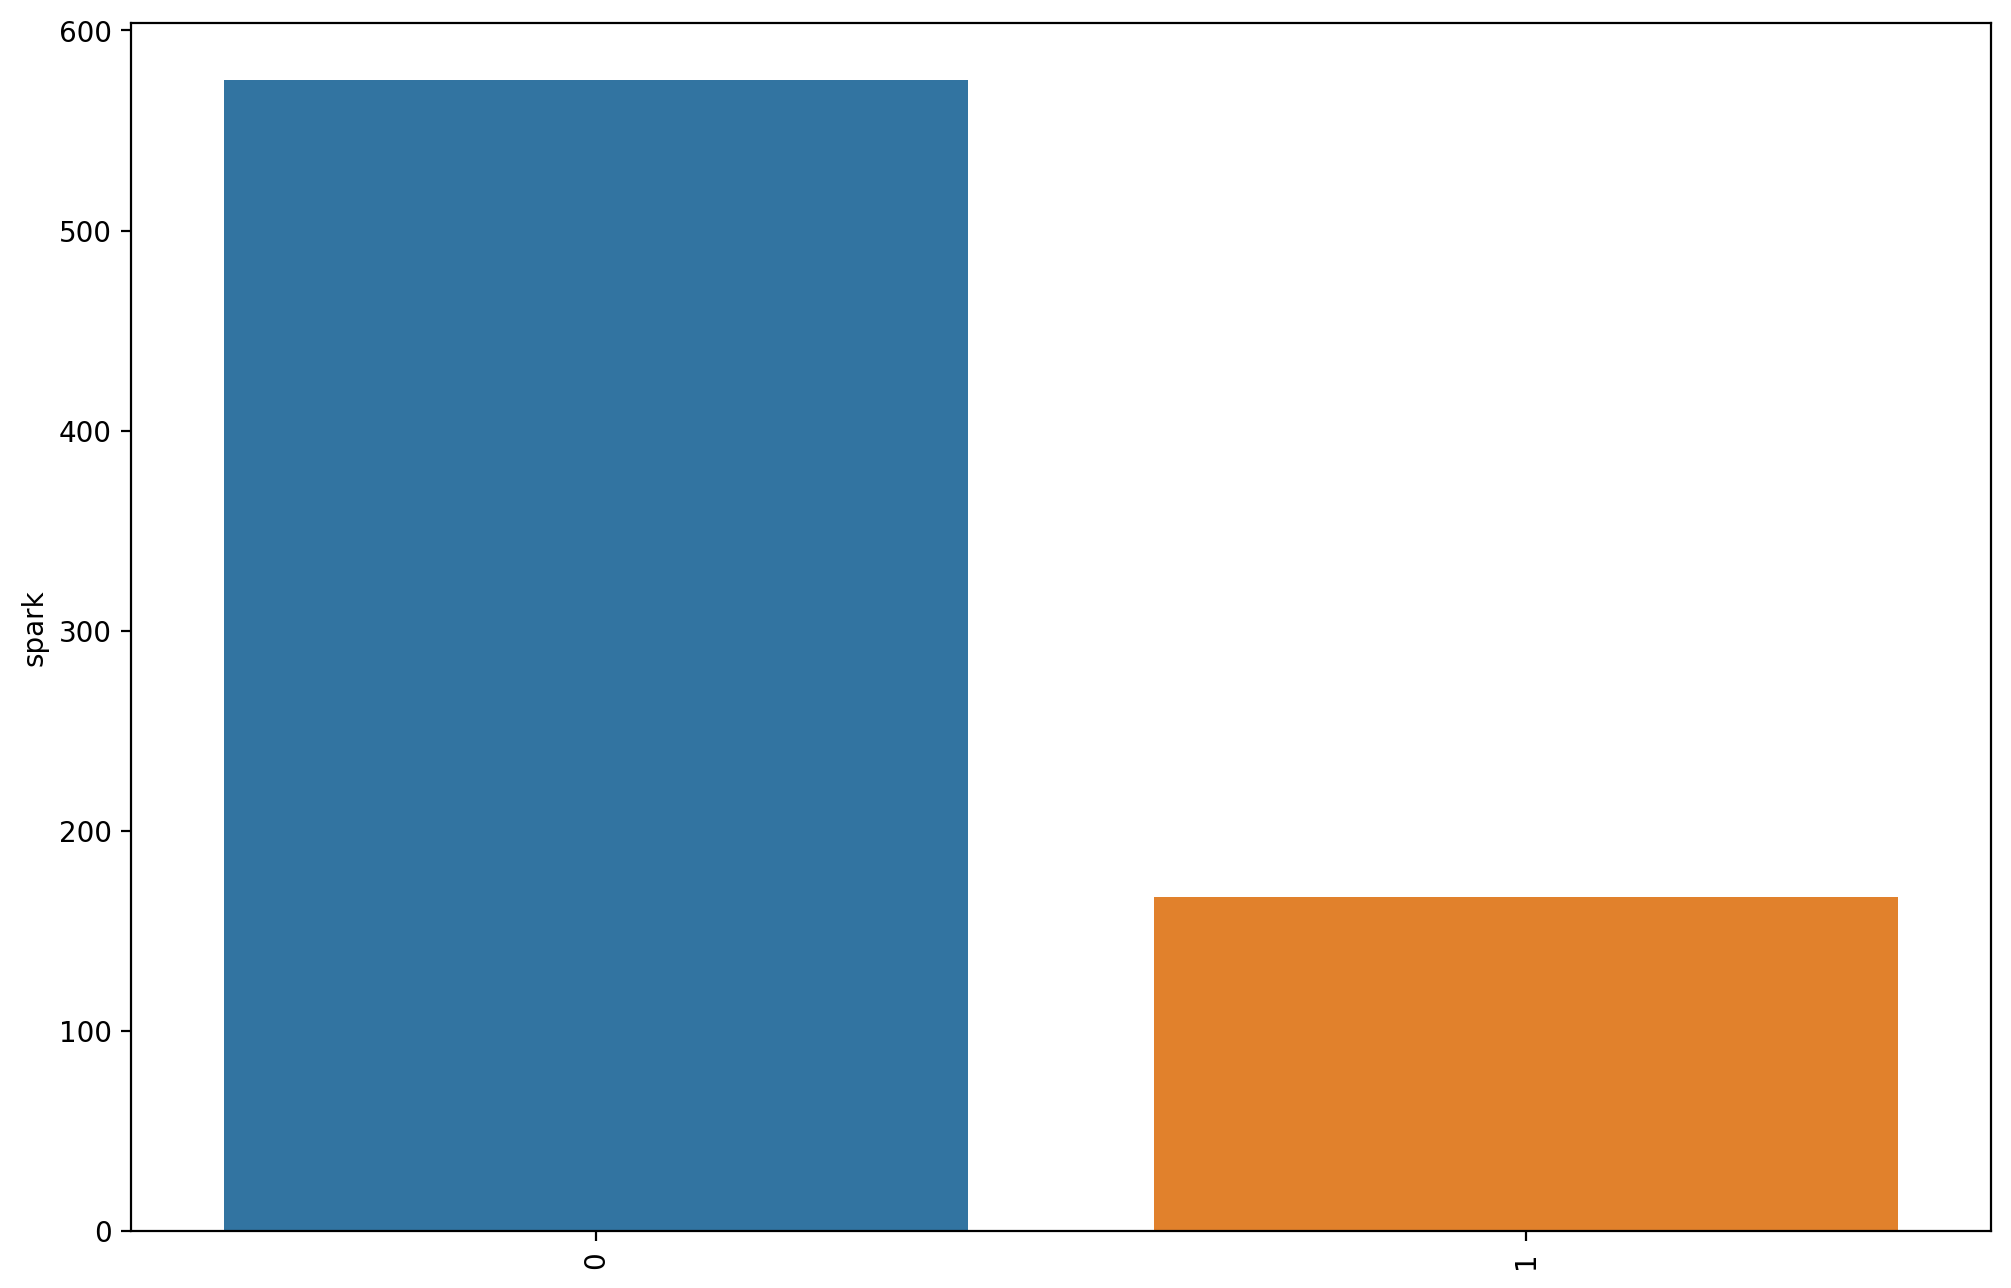

graph for excel: total = 2


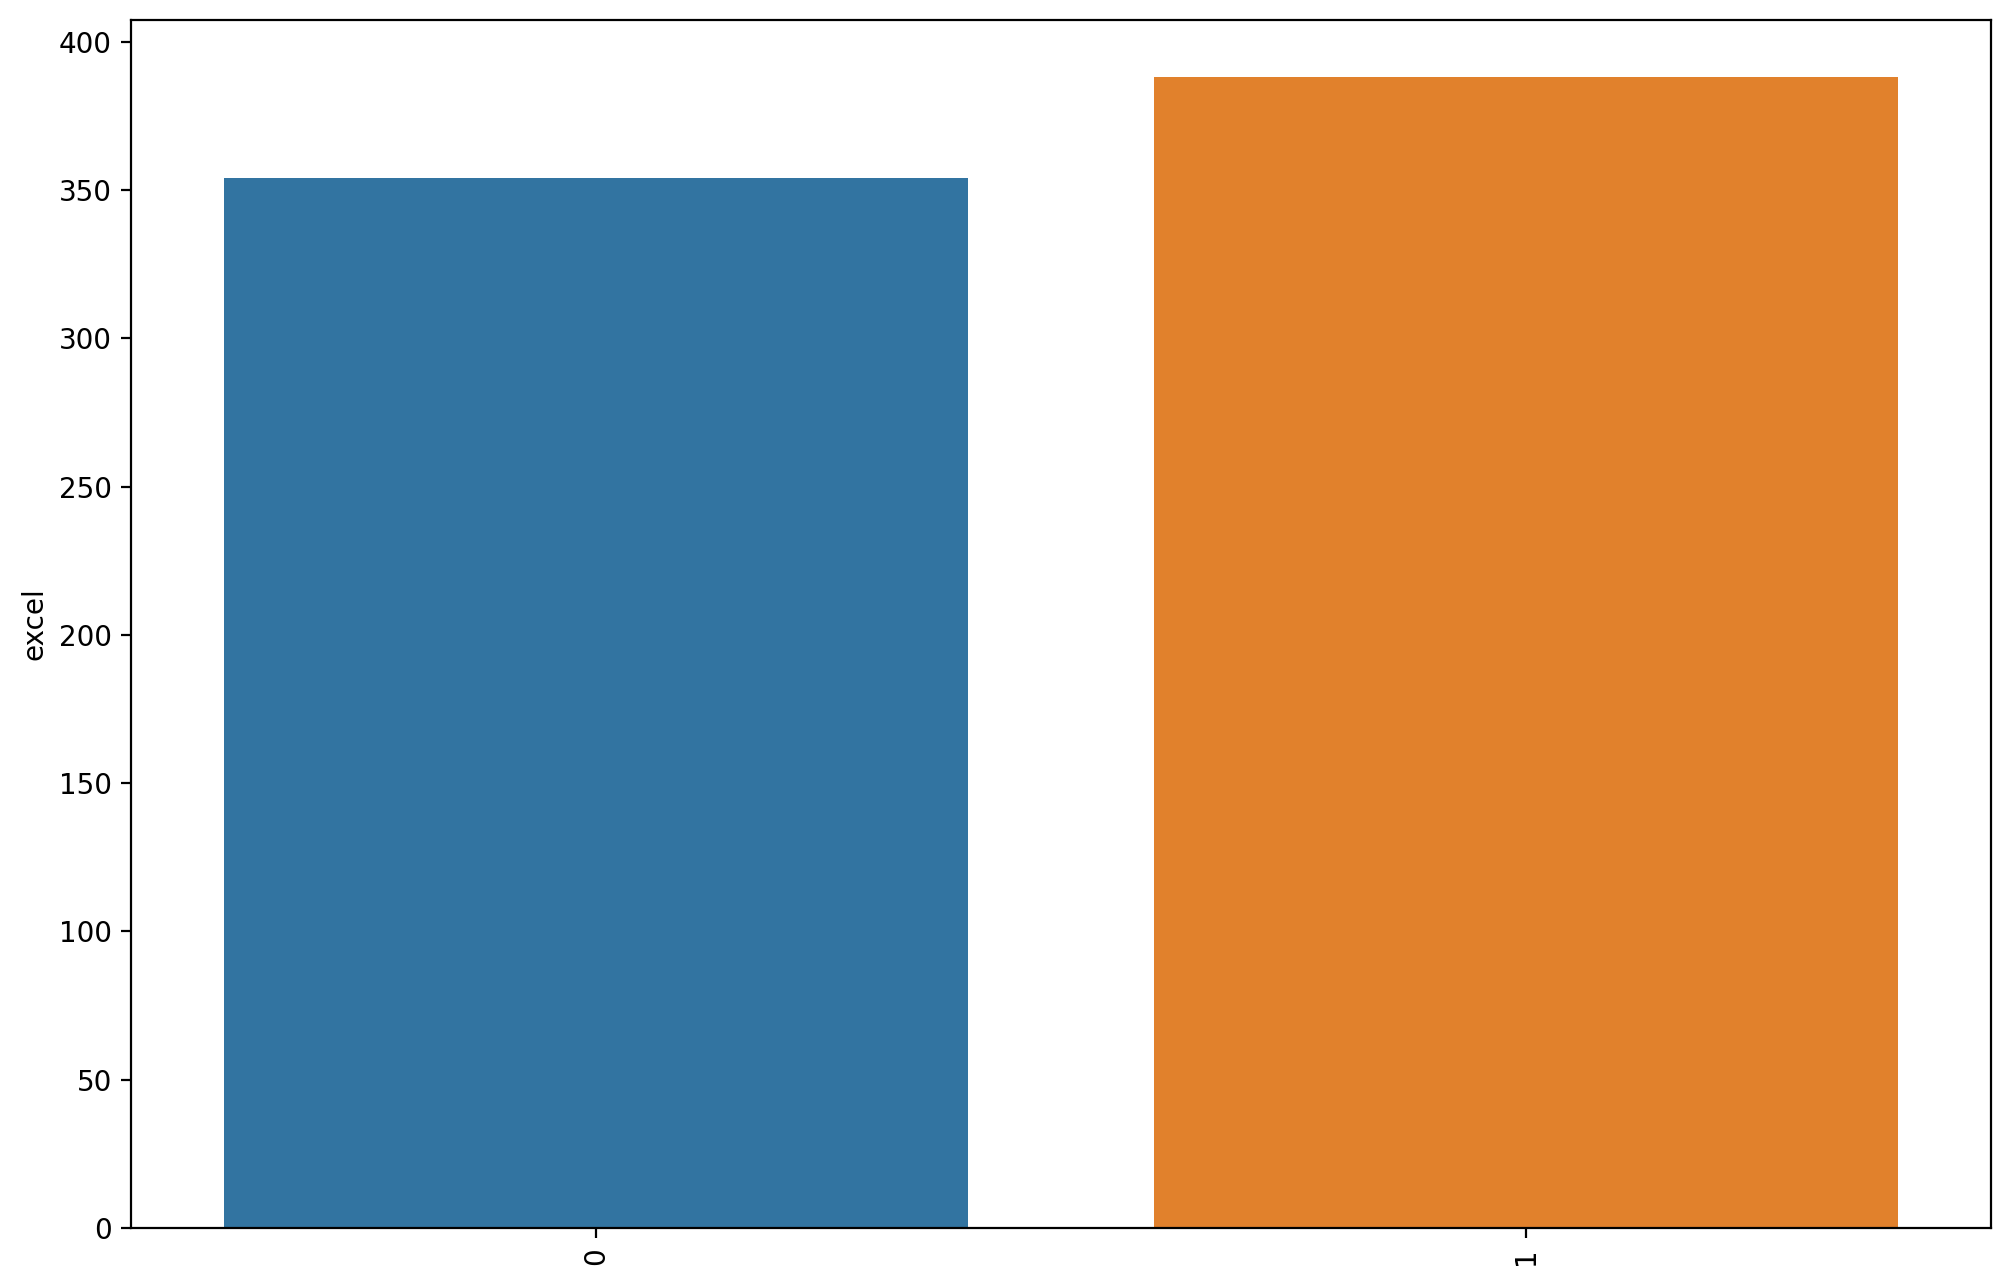

graph for aws: total = 2


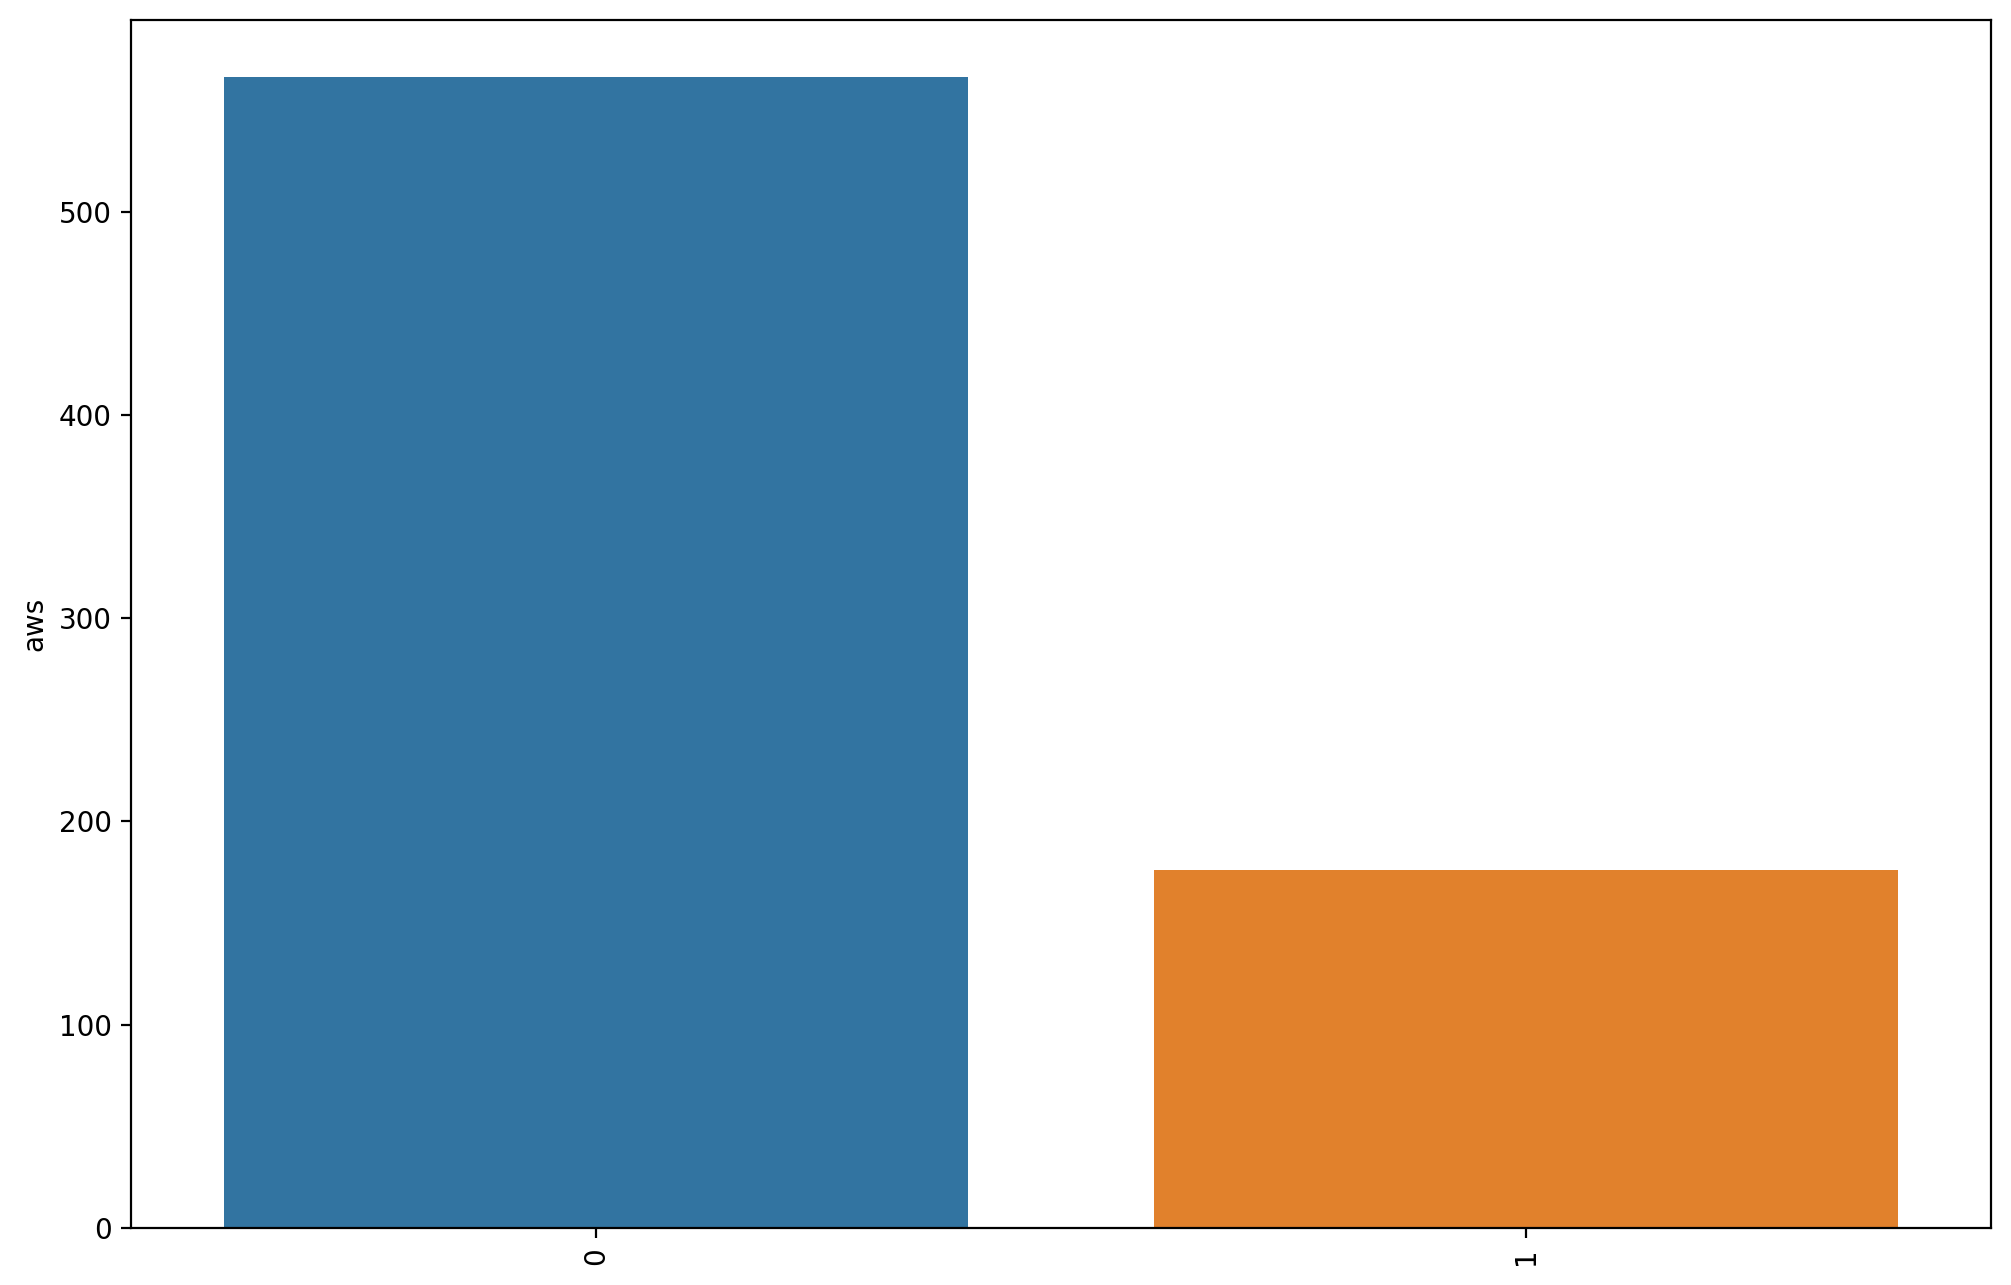

graph for r_studio: total = 2


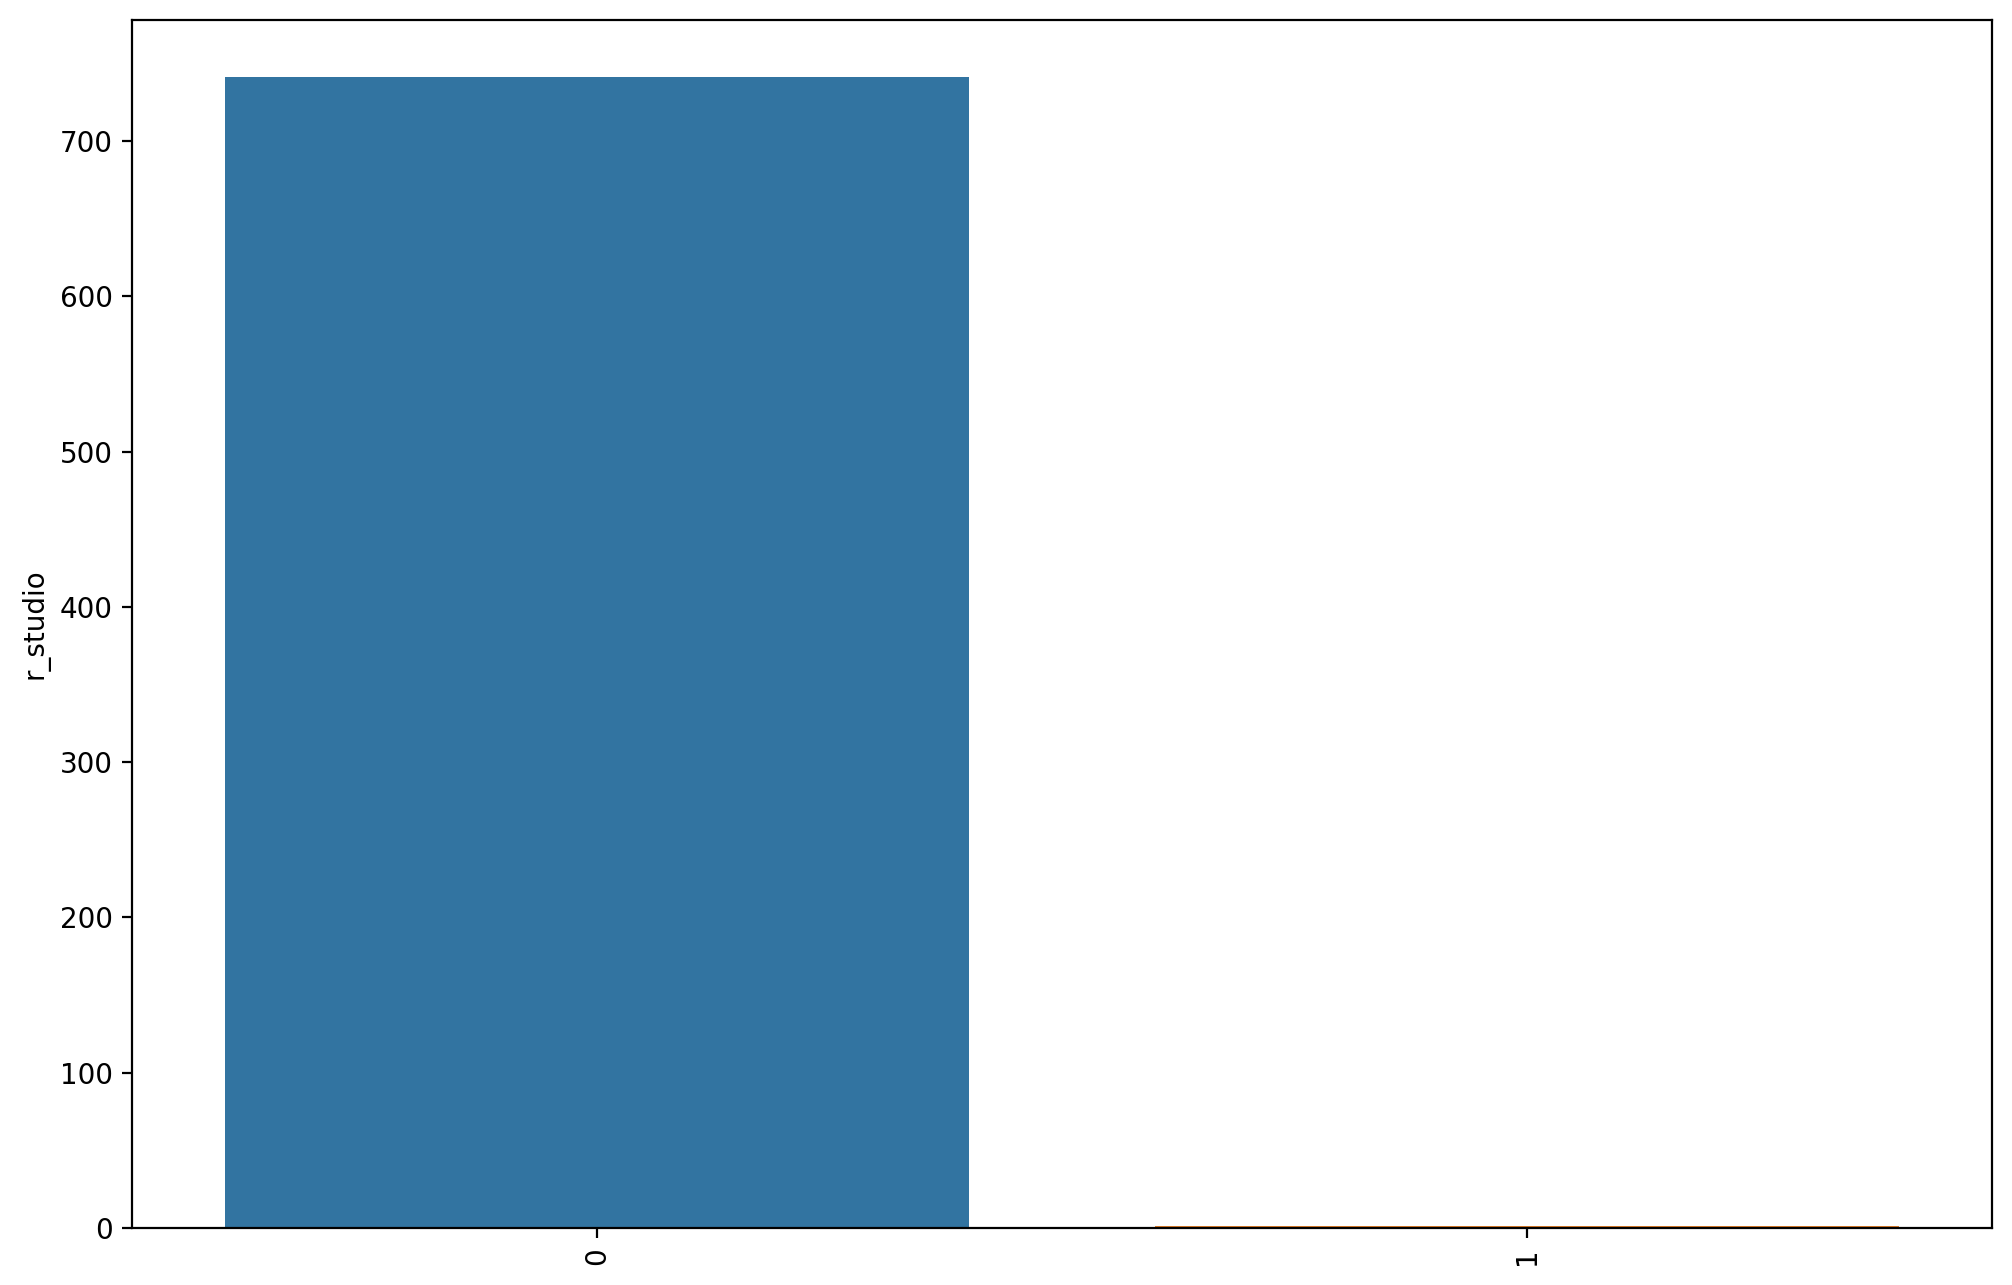

graph for job_simp: total = 7


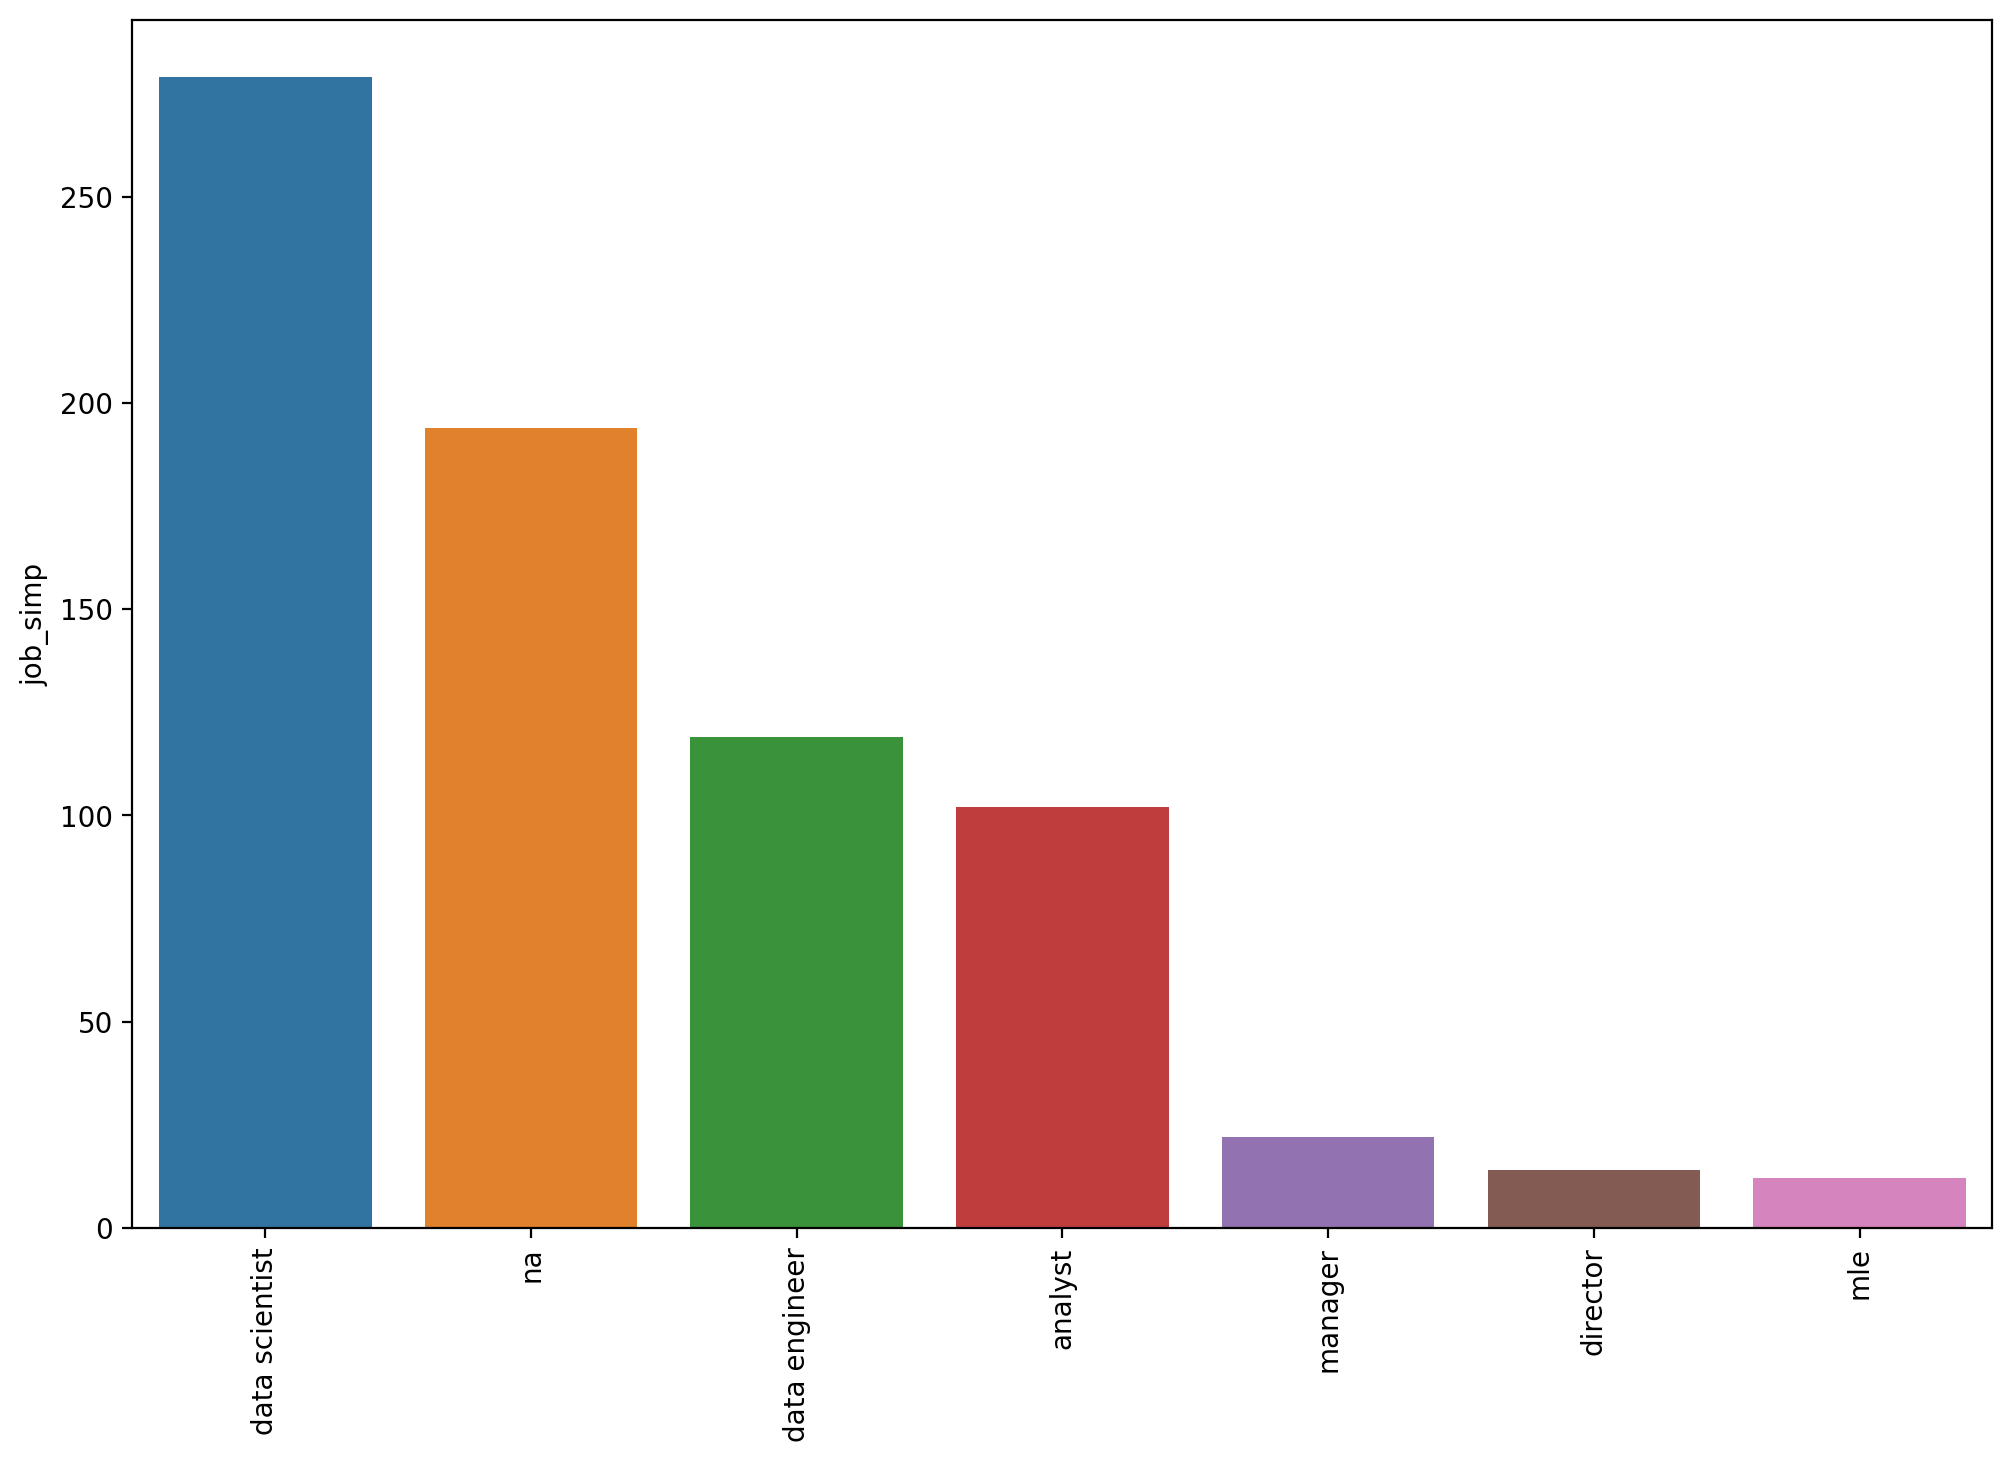

graph for seniority: total = 3


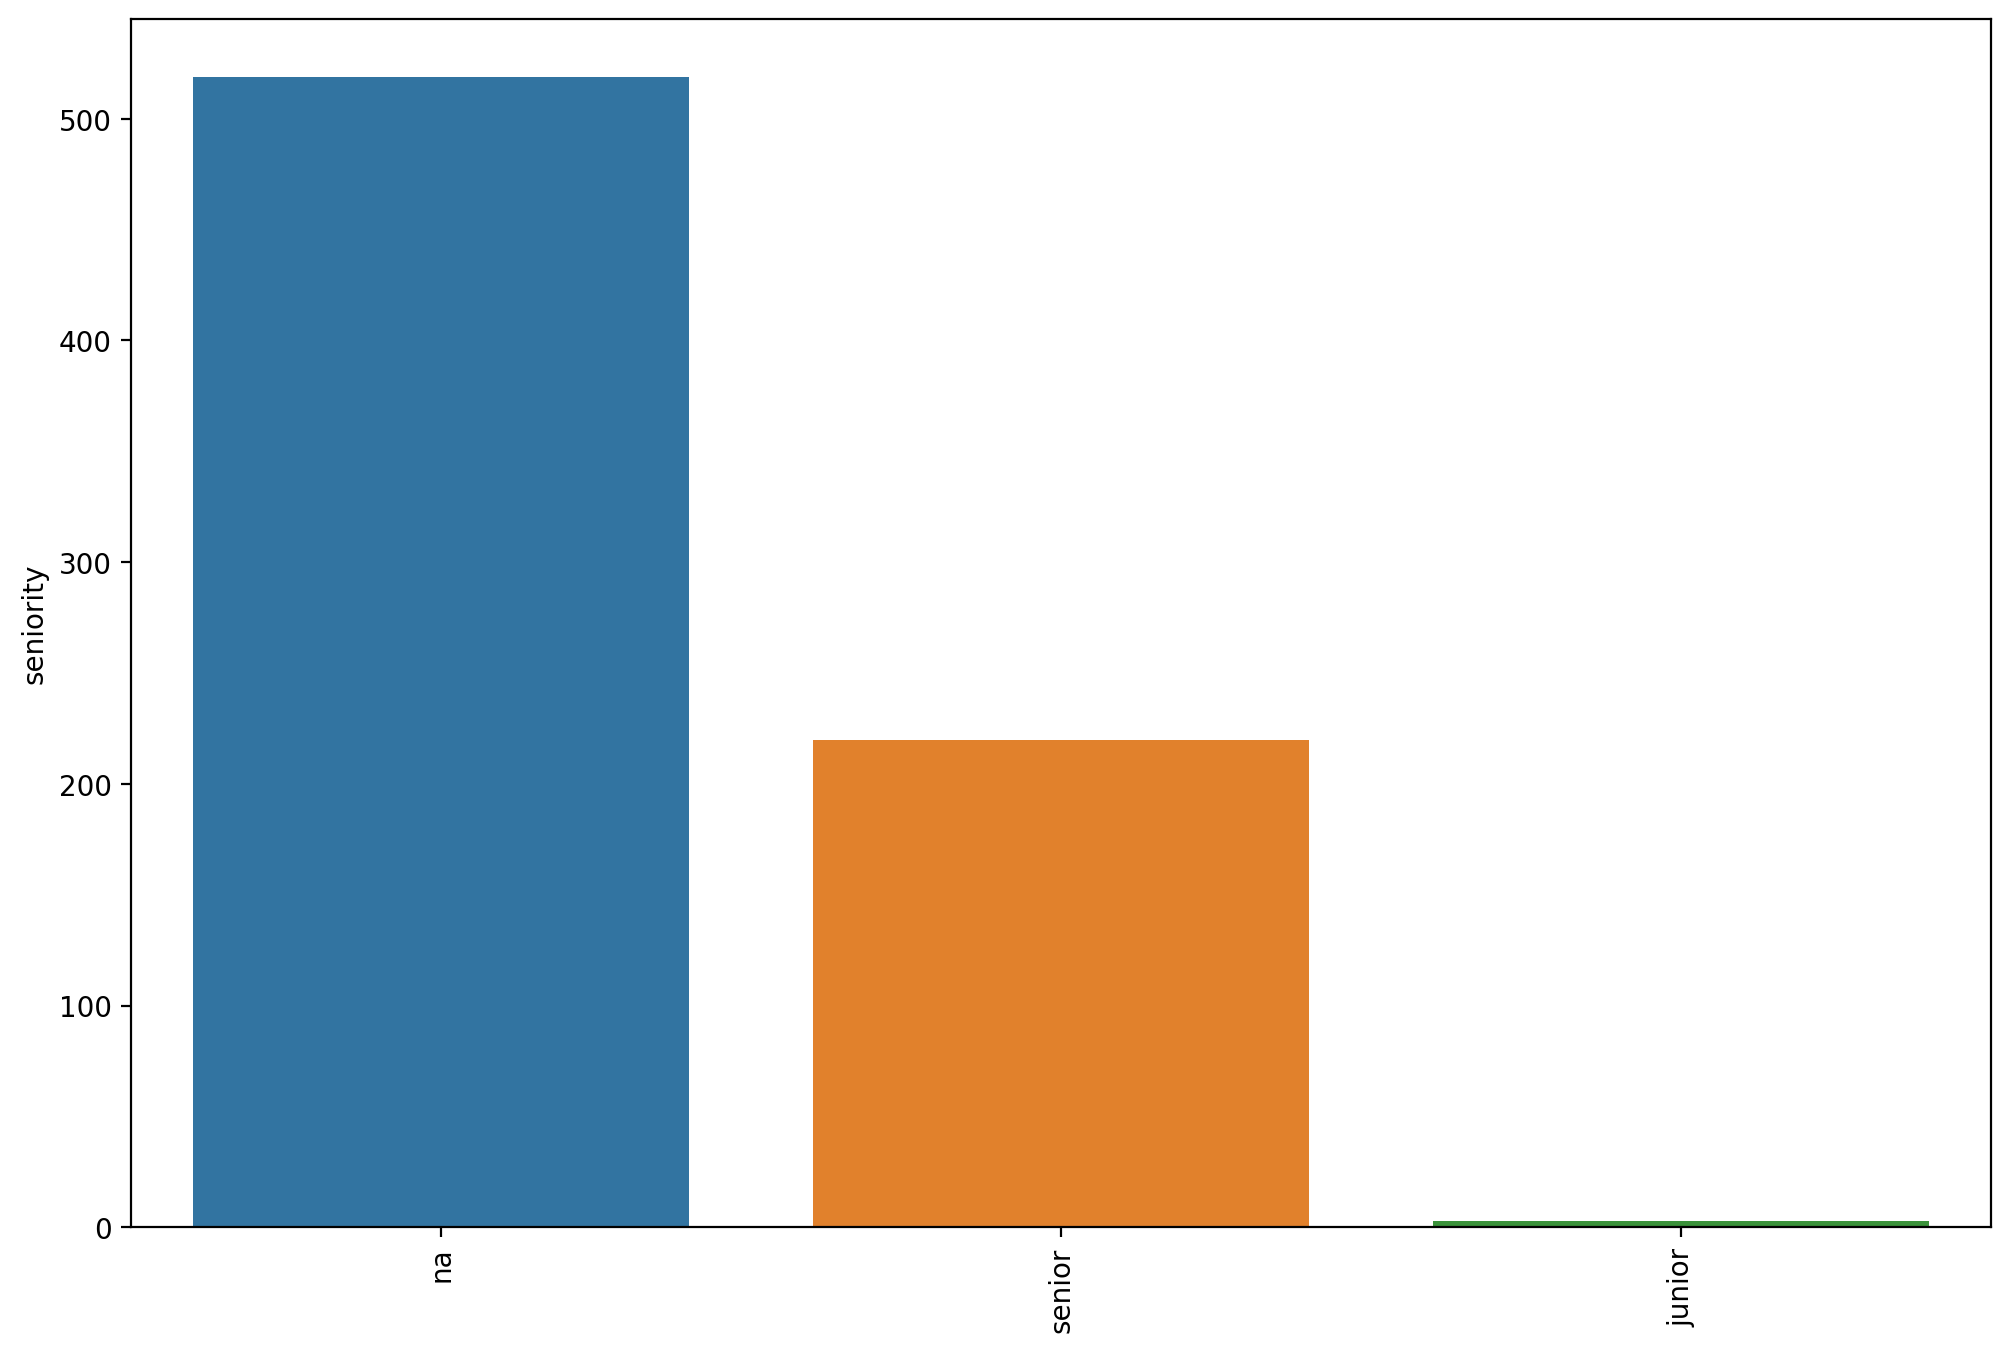

In [29]:
for i in df_cat.columns:
    plt.figure(figsize=(12,8), dpi=200)
    cat = df_cat[i].value_counts()
    print('graph for %s: total = %d' % (i,len(cat)))
    sns.barplot(x=cat.index, y=cat)
    plt.xticks(rotation=90)
    plt.show()

graph for Location: total = 20


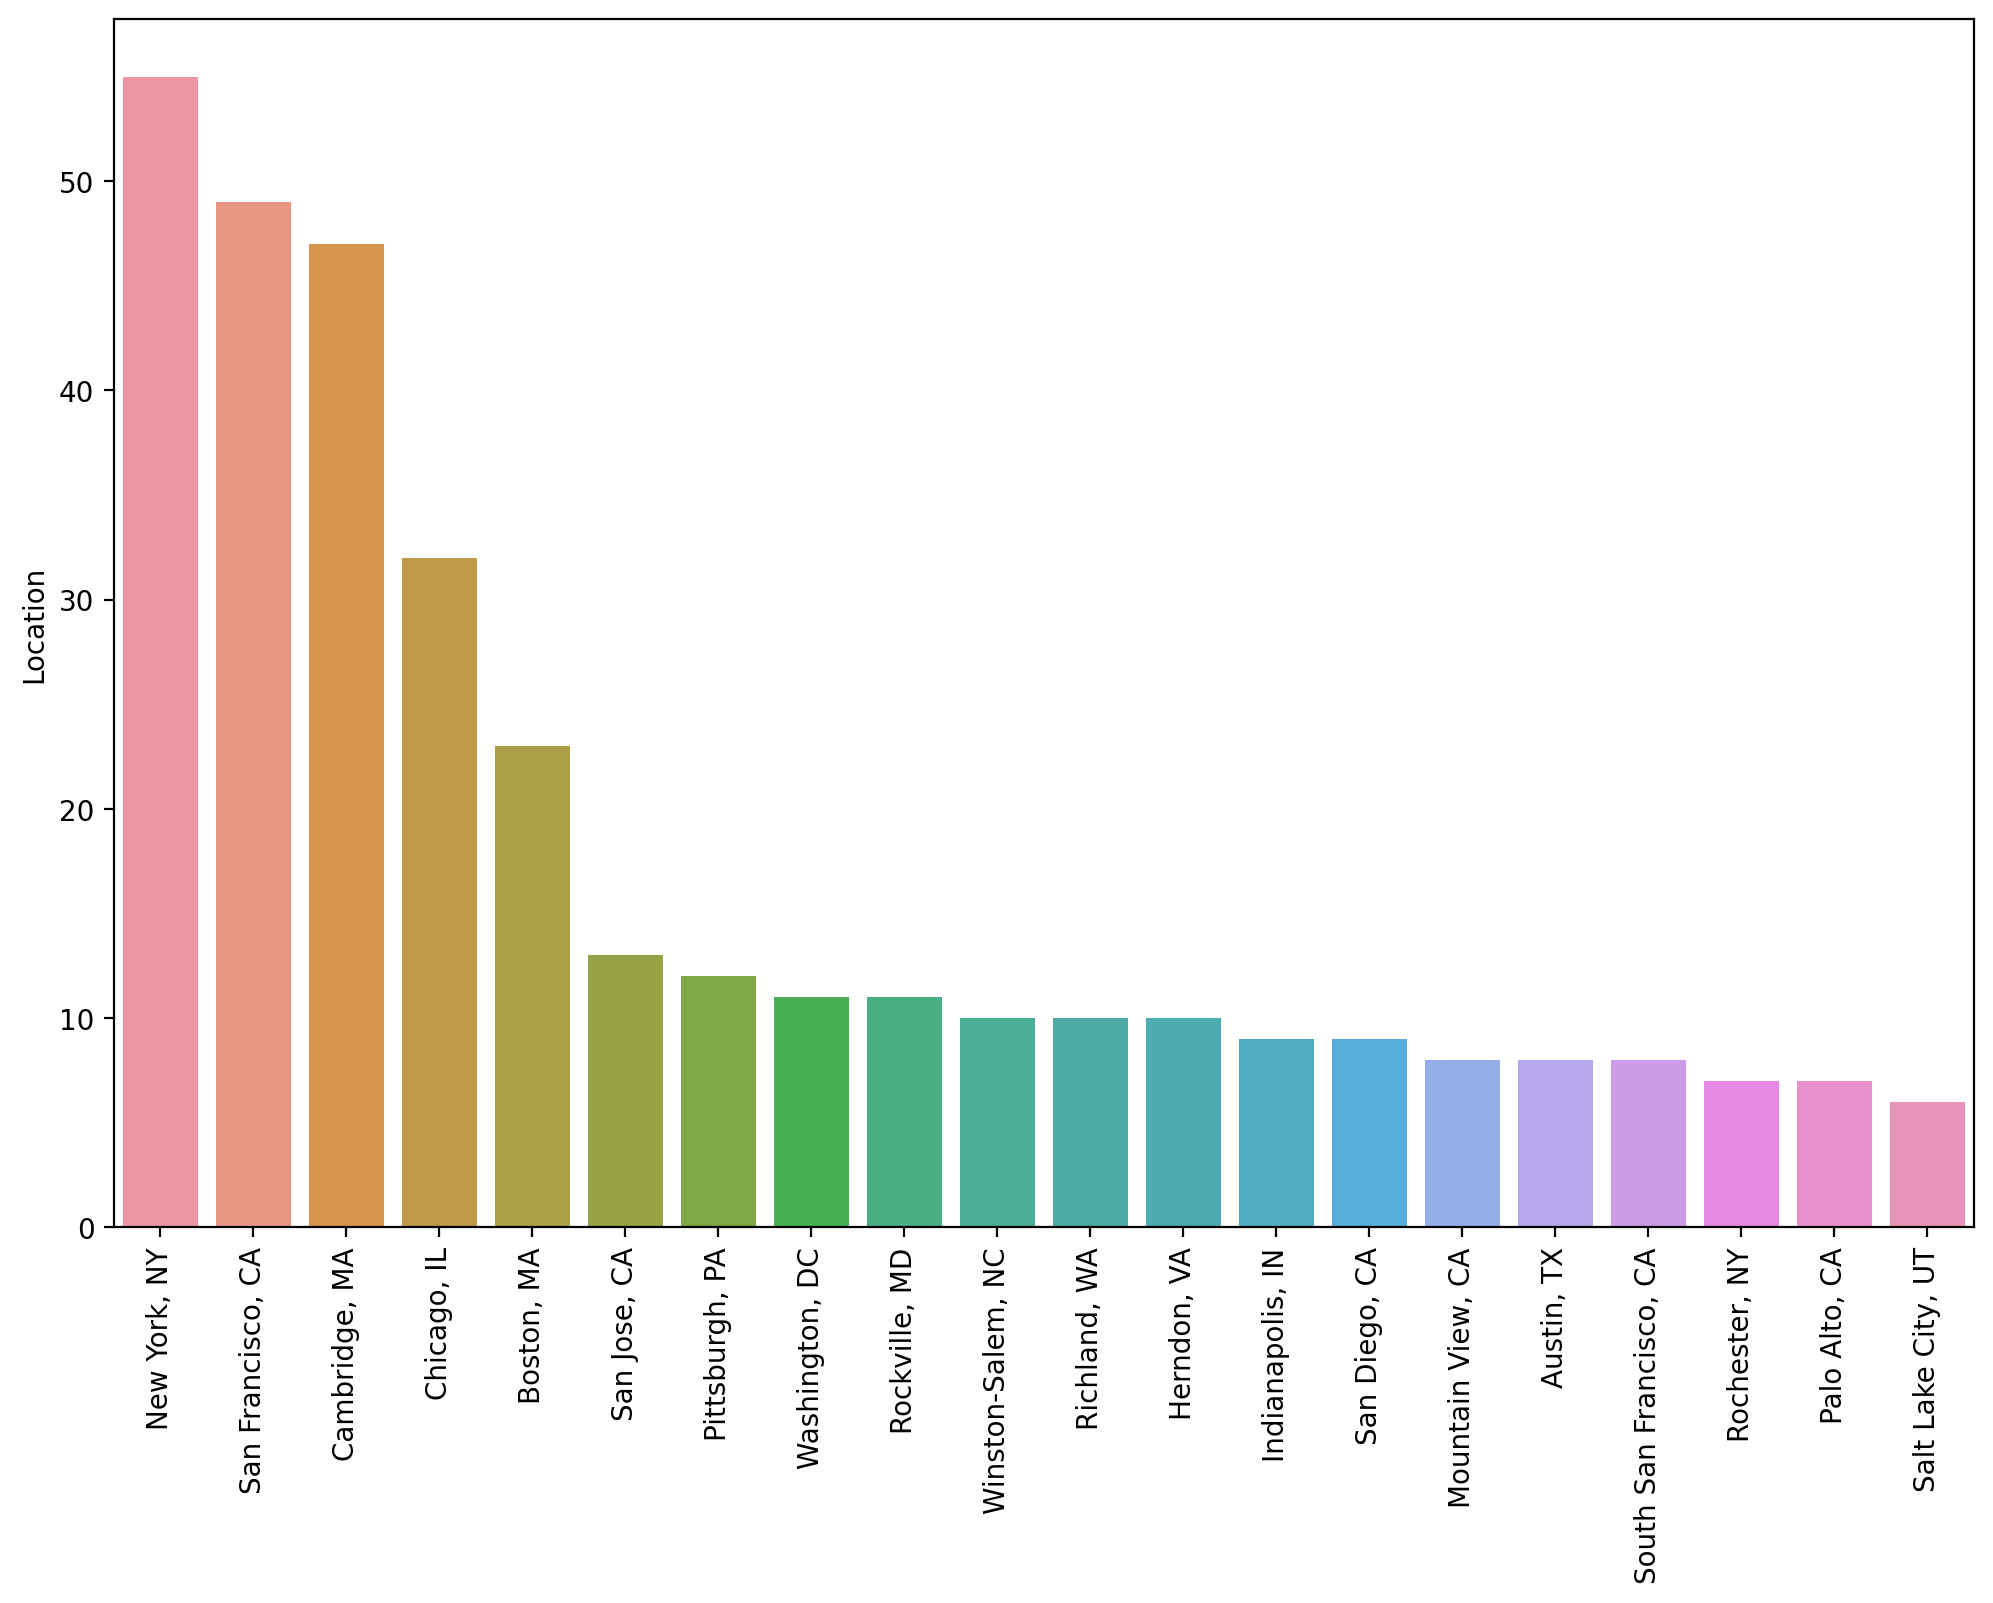

graph for Headquarters: total = 20


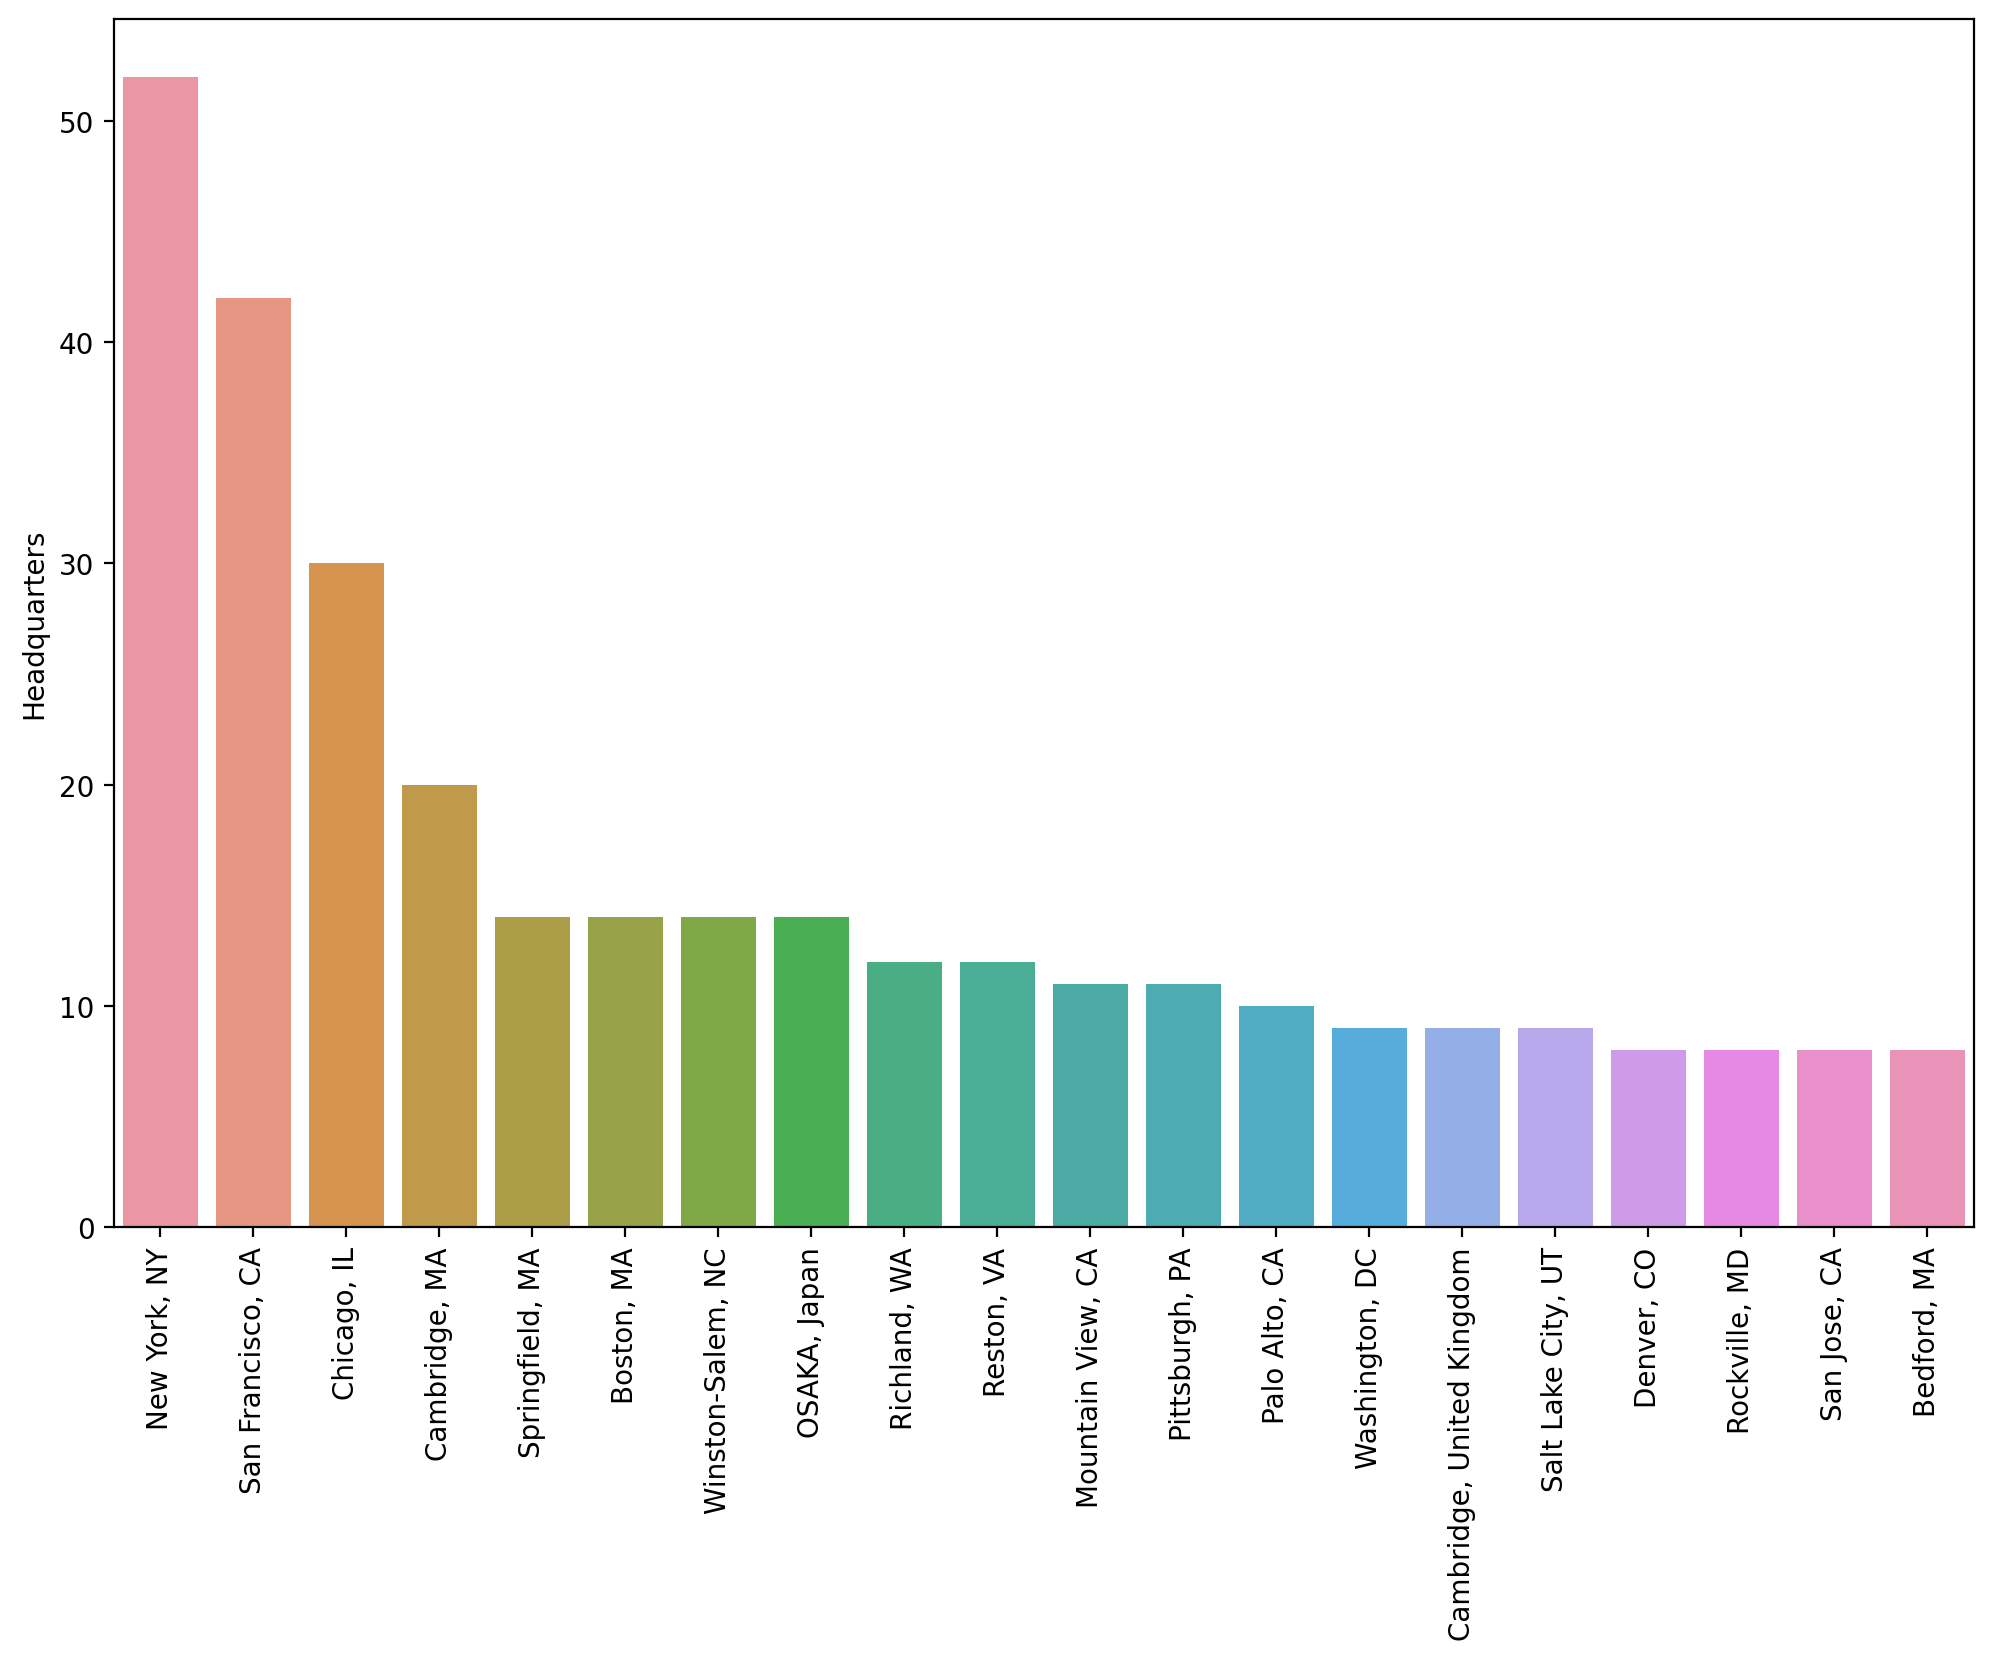

In [30]:
for i in df[['Location','Headquarters']].columns:
    plt.figure(figsize=(12,8), dpi=200)
    cat = df[i].value_counts()[:20]
    print('graph for %s: total = %d' % (i,len(cat)))
    sns.barplot(x=cat.index, y=cat)
    plt.xticks(rotation=90)
    plt.show()

In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'emp_provided', 'salary', 'min_salary', 'max_salary', 'avg',
       'job_state', 'HQ_job', 'age', 'python', 'spark', 'excel', 'aws',
       'r_studio', 'job_simp', 'seniority', 'desc_len', 'ownership_types',
       'num_comp'],
      dtype='object')

In [32]:
pd.pivot_table(df, index=['job_simp', 'seniority'], values='avg')

avg
job_simp       seniority            
analyst        junior      53.250000
               na          61.308219
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist junior     106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.958333
na             na          74.953846
               senior     112.671875

In [33]:
pd.pivot_table(df, index=['job_state', 'job_simp'], values='avg', aggfunc='count').sort_values('job_state', ascending=False)

avg
job_state job_simp           
WI        na                4
          data scientist    3
          analyst           3
WA        na                1
          data scientist   17
          analyst           3
VA        na                5
          mle               2
          data scientist   18
          data engineer    10
          analyst           6
UT        data engineer     3
          analyst           4
          data scientist    3
TX        na                7
          data scientist   13
          data engineer     8
TN        data scientist    1
          data engineer    10
          analyst           2
SC        na                1
RI        analyst           1
PA        data scientist    6
          data engineer     1
          analyst           8
          manager           3
          na               15
OR        data scientist    3
          data engineer     1
OH        na                3
          data scientist    7
          analyst           4
NY        na               12
          mle               2
          data scientist   40
          data engineer     4
          analyst          14
NM        data scientist    3
NJ        data scientist    4
          analyst           6
          data engineer     2
          manager           2
          director          2
          na                1
NE        na                4
NC        na               12
          data scientist    3
          data engineer     6
MO        na                3
          manager           1
          data scientist    3
          analyst           2
MN        data engineer     1
          analyst           1
MI        manager           2
          data scientist    4
MD        na               16
          data scientist   13
          data engineer     3
          analyst           3
MA        na               46
          manager           5
          director          6
          data scientist   30
          data engineer    12
          analyst           4
LA        analyst           1
          na                1
          data engineer     2
KY        data scientist    2
          na                4
KS        mle               3
IN        na                4
          data scientist    2
          data engineer     4
IL        na                8
          director          6
          data scientist   15
          data engineer     8
          analyst           3
ID        analyst           2
IA        data engineer     3
          analyst           2
GA        data scientist    3
          na                3
FL        data scientist    7
          data engineer     3
          analyst           6
DE        na                6
DC        data scientist    5
          data engineer     4
          analyst           2
CT        na                3
          data scientist    2
CO        data scientist    3
          analyst           1
          data engineer     3
          mle               1
          na                3
CA        na               28
          mle               4
          manager           9
          data scientist   68
          data engineer    25
          analyst          18
AZ        data scientist    1
          data engineer     5
          analyst           1
          na                2
AL        na                2
          data engineer     1
          analyst           5

In [34]:
pd.pivot_table(df[df['job_simp']=='data scientist'], index='job_state', values='avg').sort_values('avg', ascending=False)

,avg
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [35]:
pivot = df[['job_simp' ,'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size',
       'Industry',
       'hourly', 'min_salary', 'max_salary', 'avg',
       'job_state', 'HQ_job', 'age', 'python', 'spark', 'excel', 'aws',
       'r_studio', 'seniority',
       'num_comp']]

In [36]:
for i in pivot.columns:
    print('\n'+i +'\n')
    print(pd.pivot_table(data=pivot, index=i,values='avg').sort_values('avg',ascending=False))


job_simp

                       avg
job_simp                  
director        168.607143
mle             119.958333
data scientist  117.564516
data engineer   105.403361
na               87.396907
manager          84.022727
analyst          65.857843

Rating

               avg
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286

Company Name

                                                           avg
Company Name                    

ValueError: Grouper for 'avg' not 1-dimensional

In [ ]:
pd.pivot_table(data=df,index='Revenue', columns='python', values='avg',aggfunc='count')

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(interpolation="bilinear")
plt.axis('off')
plt.show()

In [38]:
df.to_csv('data_for_models.csv',index=False)